In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
import pandas as pd

In [2]:
import tarfile
data_path = '/content/drive/MyDrive/maabada2/data.tar'

# Open the .tar file
tar = tarfile.open(data_path, 'r')

# Extract all files from the .tar file
tar.extractall()

# Close the .tar file
tar.close()


In [ ]:
type()

In [1]:

train_path = '/content/data/train'
test_path = "/content/data/test"

In [ ]:
import os

first_file = "patient_0.psv"

# Extract the numeric part of the first file name
first_number = int(''.join(filter(str.isdigit, first_file)))


file_list_train = [file for file in os.listdir(train_path) if file.endswith('.psv')]
file_list_test = [file for file in os.listdir(test_path) if file.endswith('.psv')]
# Sort the file list based on the numeric part of the file names
sorted_file_list_train = sorted(file_list_train, key=lambda x: int(''.join(filter(str.isdigit, x))))
sorted_file_list_test = sorted(file_list_test, key=lambda x: int(''.join(filter(str.isdigit, x))))

sorted_file_list_train[:50]

Read the PSV files and exploration of the Data

In [61]:
def combine_dataframes(train_path,file_paths):
    combined_df = pd.DataFrame()
    count = 0
    for filename in file_paths:
        
        file_path = os.path.join(train_path, filename)
        df = pd.read_csv(file_path, sep='|')
        #df = select_columns(df)
        # Apply label and filter patients
        df = label_and_filter_patients(df)

        # Remove 'SepsisLabel' column
        df = remove_sepsis_label(df)

        df = describe_summary(df)
        #print(df)
        # Concatenate with combined DataFrame
        combined_df = pd.concat([combined_df, df], ignore_index=True)
        #print(combined_df)


        #print(combined_df)
        count+=1
        if count % 500 == 0:
            print(f"Count: {count}")
    return combined_df

In [60]:
import pandas as pd

def label_and_filter_patients(df):
    # Counter to track consecutive 1 values
    counter = 0

    # Iterate over the 'SepsisLabel' column
    if (df['SepsisLabel'] == 1).any():
        new_labels =1
    else:
        new_labels =0

    # Add the new 'Label' column to the dataframe
    df['Label'] = new_labels

    # Find the index of the first occurrence of SepsisLabel = 1, or the last index if not found
    first_sepsis_index = df[df['SepsisLabel'] == 1].index.min()
    if pd.isna(first_sepsis_index):
        first_sepsis_index = df.index.max()

    # Extract the rows until the first sepsis index
    filtered_df = df.loc[:first_sepsis_index, :]

    # Reset the index of the filtered dataframe
    filtered_df.reset_index(drop=True, inplace=True)

    return filtered_df


import pandas as pd

def remove_sepsis_label(df):
    new_df = df.drop('SepsisLabel', axis=1)
    return new_df


In [63]:
import pandas as pd

def describe_summary(df):
    summary = {}
    num_rows = df.shape[0]
    
    for column in df.columns:
        prefix = column.lower()
        stats = df[column].describe().to_dict()
        #print(stats)
        
        if column.lower() == 'label':
            summary[f"{prefix}_value"] = df['Label'][0]
        else:
            if  stats['count']==1:
              stats['std']= stats['mean']

            if 'count' in stats:
              count = stats['count']
              count_ratio = count / num_rows
              stats['count'] = count_ratio

            mean_key = f"{prefix}_mean"
            std_key = f"{prefix}_std"
            count_key = f"{prefix}_count"
            min_key = f"{prefix}_min"
            max_key = f"{prefix}_max"

            stats[mean_key] = stats.pop('mean')
            stats[std_key] = stats.pop('std')
            stats[count_key] = stats.pop('count')
            stats[min_key] = stats.pop('min')
            stats[max_key] = stats.pop('max')

            
        
            summary.update({k: v for k, v in stats.items() if k in [mean_key, std_key, count_key,min_key,max_key]})
    
    df_summary = pd.DataFrame([summary])
    
    return df_summary


In [3]:

#sorted_file_list_train= sorted_file_list_train[:50]

#df_train = combine_dataframes(train_path,sorted_file_list_train)


In [4]:
#df_train.to_csv('combined_data_train.csv', index=True)

In [5]:
df_train = pd.read_csv('/content/combined_data_train.csv')

In [68]:
df_train

,Unnamed: 0,hr_mean,hr_std,hr_count,hr_min,hr_max,o2sat_mean,o2sat_std,o2sat_count,o2sat_min,...,hospadmtime_std,hospadmtime_count,hospadmtime_min,hospadmtime_max,iculos_mean,iculos_std,iculos_count,iculos_min,iculos_max,label_value
0,0,60.954545,8.144395,0.956522,54.0,94.0,97.000000,2.138090,0.956522,94.0,...,2.906048e-14,1.0,-98.60,-98.60,12.0,6.782330,1.0,1.0,23.0,0
1,1,87.875000,6.930164,0.960000,79.0,101.0,100.000000,0.000000,0.960000,100.0,...,0.000000e+00,1.0,-0.02,-0.02,14.0,7.359801,1.0,2.0,26.0,1
2,2,74.828571,7.875822,0.972222,60.0,89.0,96.161290,2.252358,0.861111,92.0,...,1.759331e-18,1.0,-0.01,-0.01,20.5,10.535654,1.0,3.0,38.0,0
3,3,76.559524,10.748909,0.933333,58.0,101.0,96.583333,1.521860,0.933333,94.0,...,3.508651e-18,1.0,-0.02,-0.02,26.0,13.133926,1.0,4.0,48.0,0
4,4,98.613636,5.520377,0.916667,91.0,107.0,95.340909,1.768685,0.916667,92.0,...,0.000000e+00,1.0,-214.64,-214.64,12.5,7.071068,1.0,1.0,24.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,104.407407,10.936914,0.931034,84.0,121.0,97.796296,1.766457,0.931034,95.0,...,9.038996e-16,1.0,-4.12,-4.12,15.0,8.514693,1.0,1.0,29.0,0
19996,19996,63.714286,6.153665,0.976744,53.0,81.0,99.642857,0.655983,0.976744,97.0,...,3.510507e-18,1.0,-0.03,-0.03,22.0,12.556539,1.0,1.0,43.0,0
19997,19997,74.928571,6.082311,1.000000,65.0,84.0,98.214286,0.611250,1.000000,97.0,...,3.600415e-18,1.0,-0.02,-0.02,8.5,4.183300,1.0,2.0,15.0,0
19998,19998,83.666667,10.030163,0.804878,60.0,110.0,99.484848,1.148945,0.804878,96.0,...,7.025095e-18,1.0,-0.05,-0.05,22.0,11.979149,1.0,2.0,42.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 202 entries, Unnamed: 0 to label_value
dtypes: float64(200), int64(2)
memory usage: 30.8 MB
None
         Unnamed: 0       hr_mean        hr_std      hr_count        hr_min  \
count  20000.000000  19822.000000  19822.000000  20000.000000  19822.000000   
mean    9999.500000     83.747642      8.491406      0.881059     69.680027   
std     5773.647028     14.620389      5.973101      0.170638     13.870612   
min        0.000000     33.360000      0.000000      0.000000     20.000000   
25%     4999.750000     73.407366      5.546824      0.869565     60.000000   
50%     9999.500000     83.031010      7.525474      0.937500     69.000000   
75%    14999.250000     93.097209     10.196299      0.972973     78.000000   
max    19999.000000    174.037975    135.000000      1.000000    140.500000   

             hr_max    o2sat_mean     o2sat_std   o2sat_count     o2sat_min  \
count  19822.000000  19809.

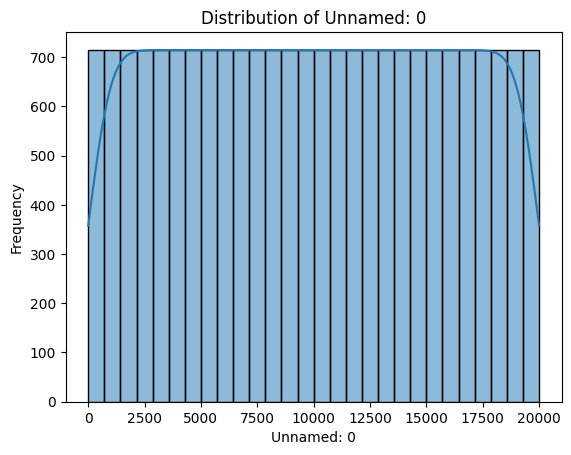

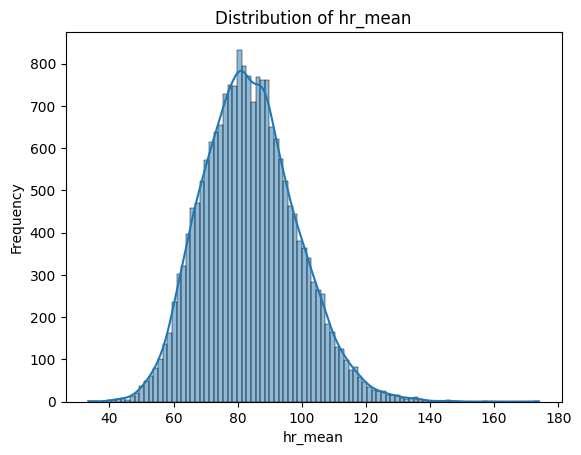

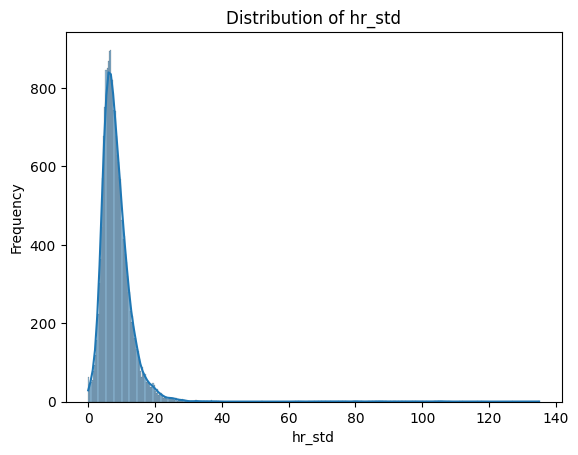

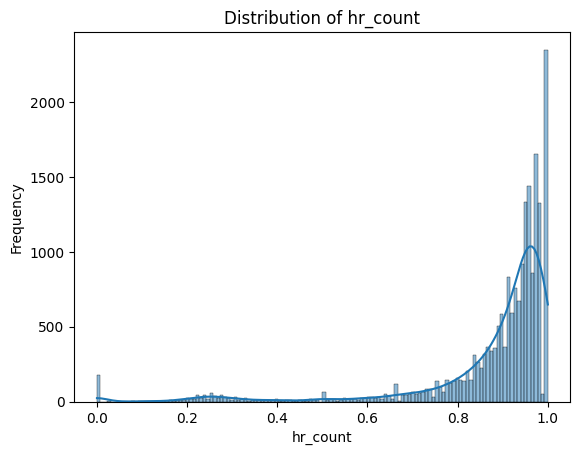

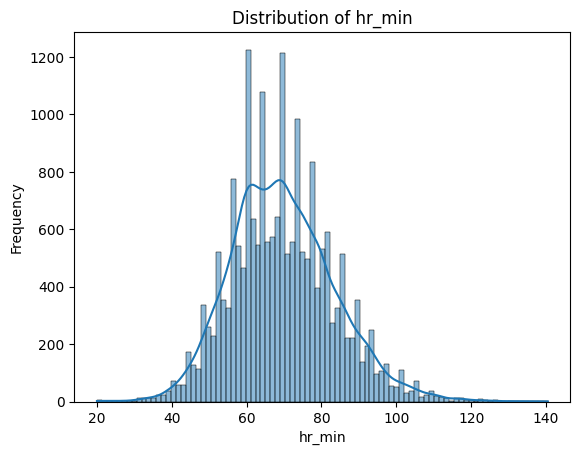

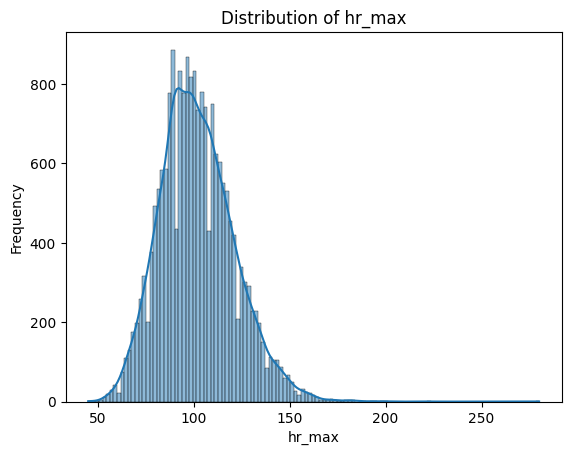

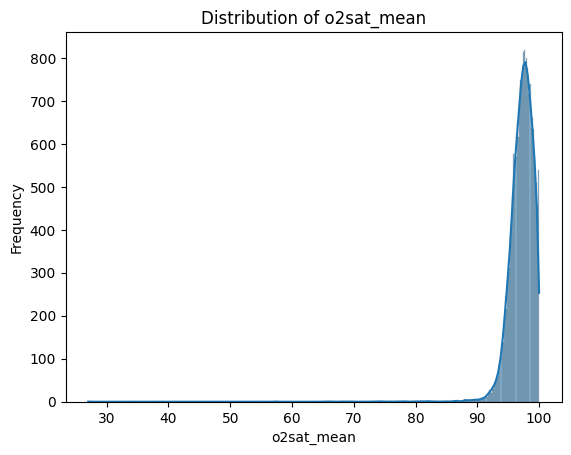

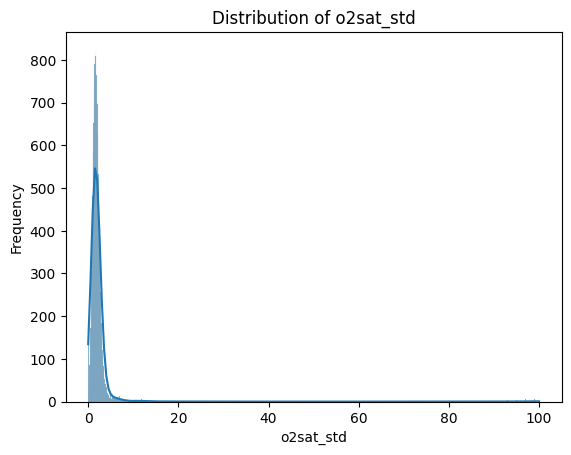

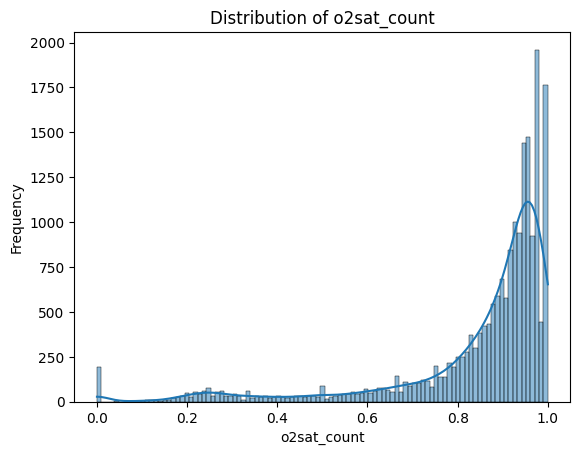

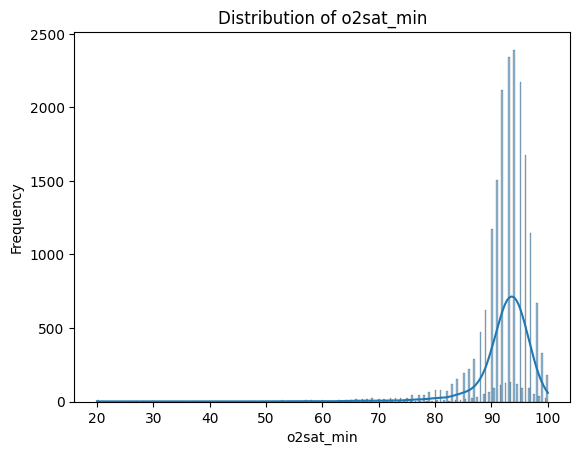

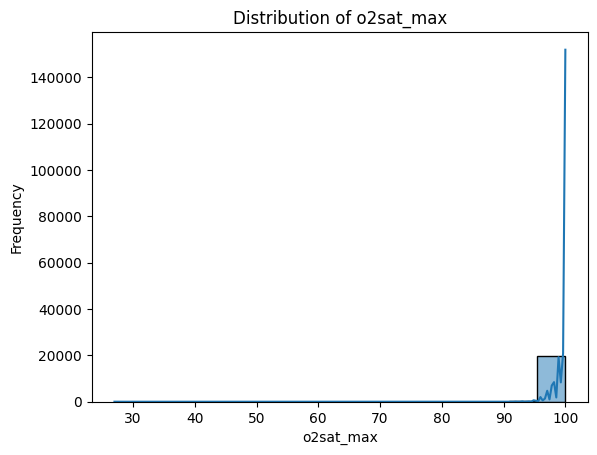

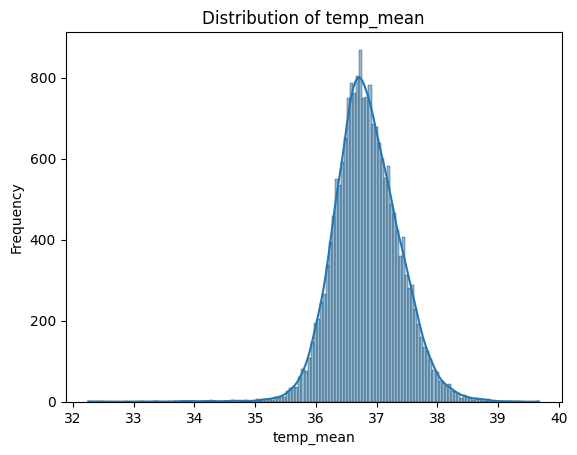

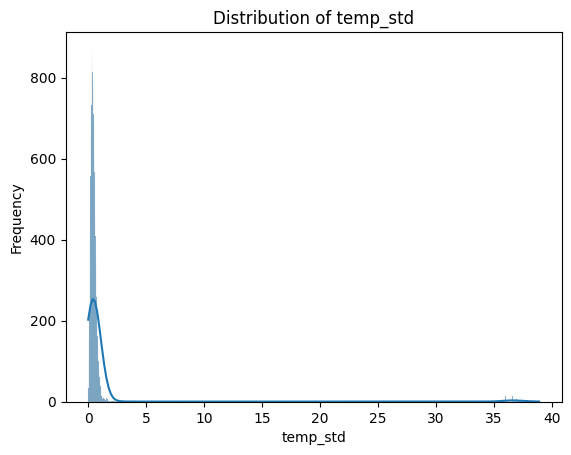

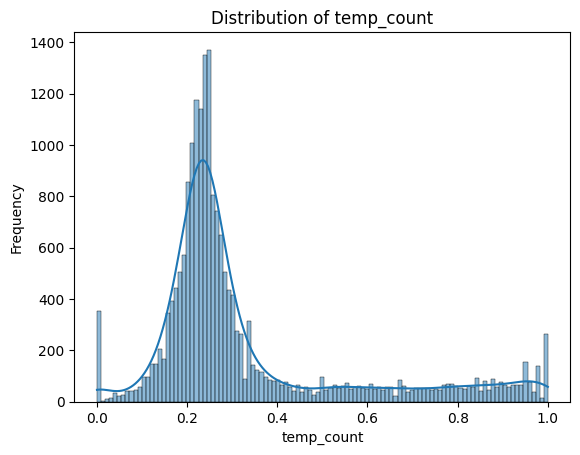

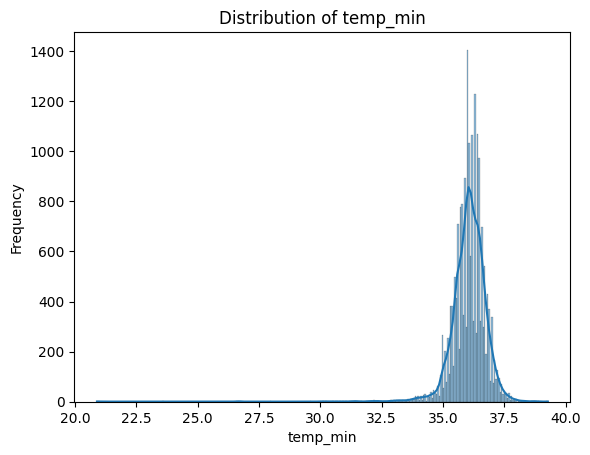

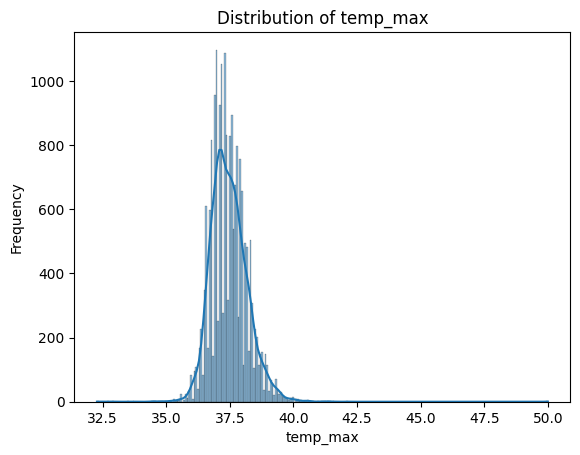

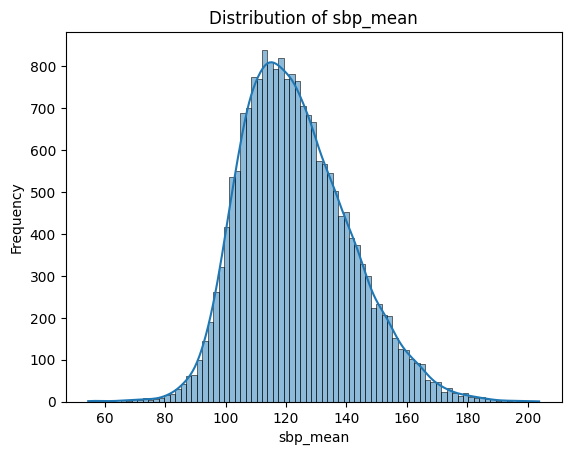

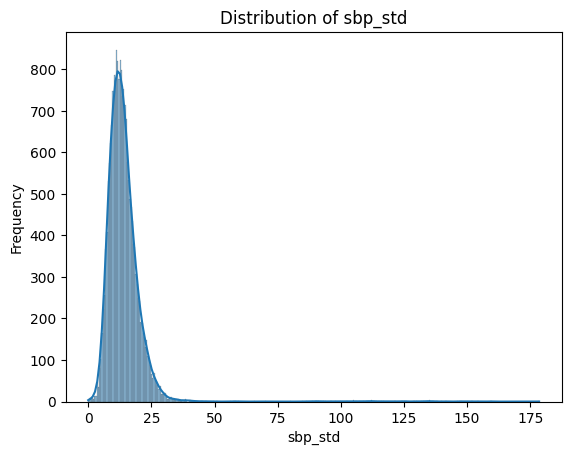

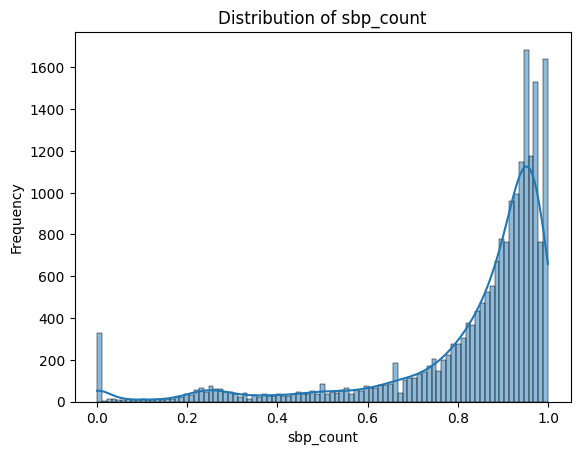

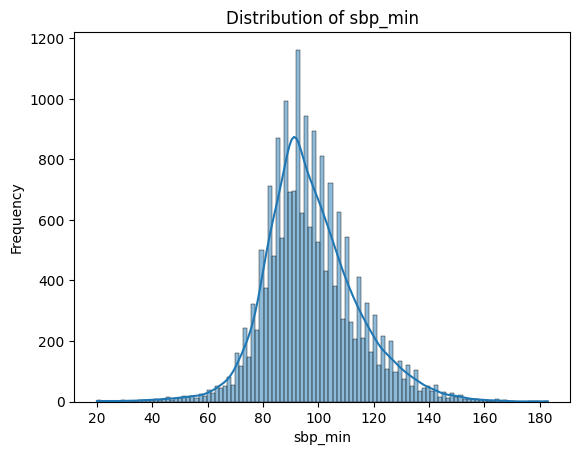

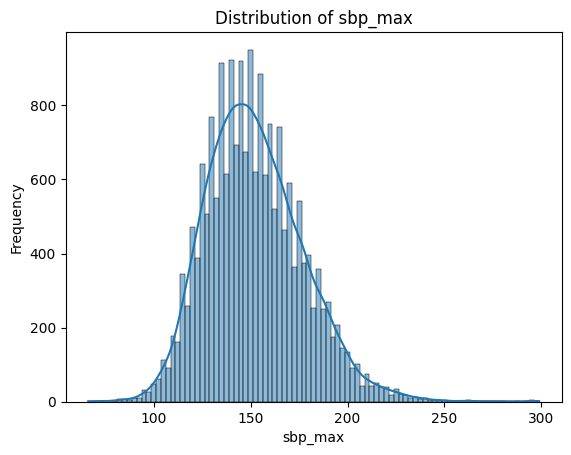

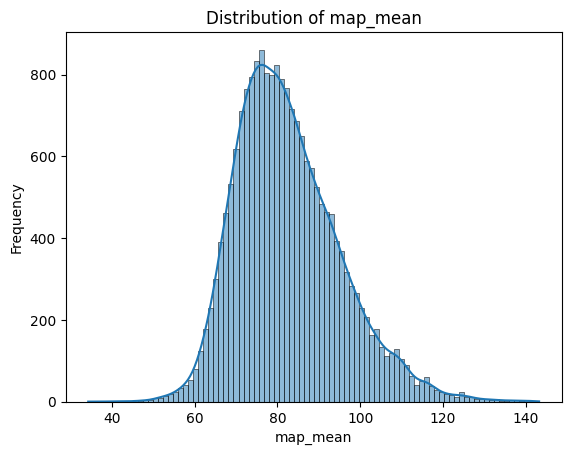

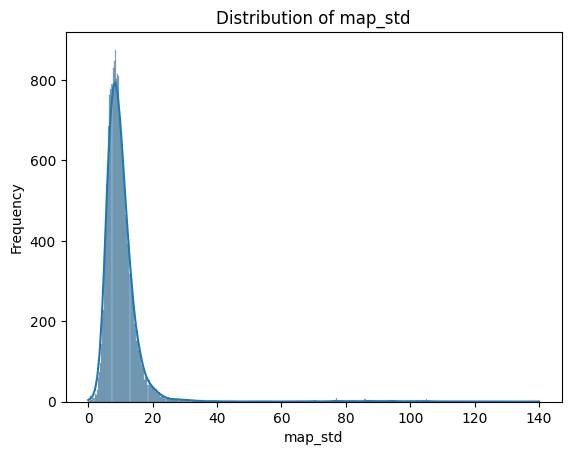

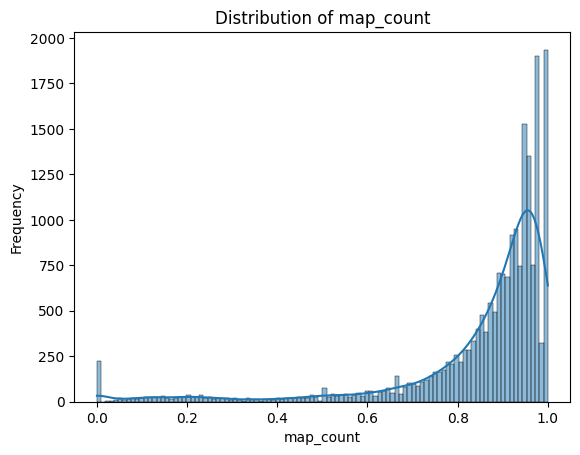

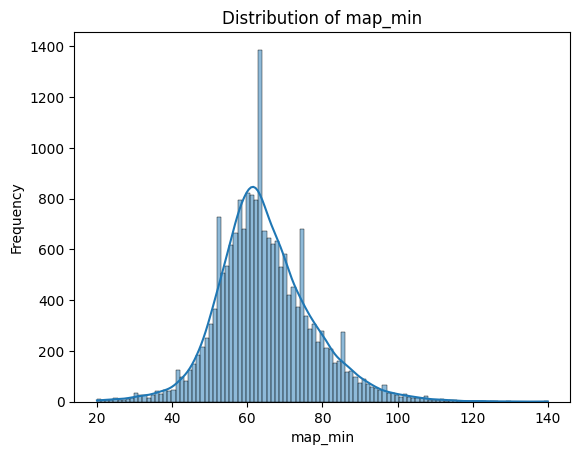

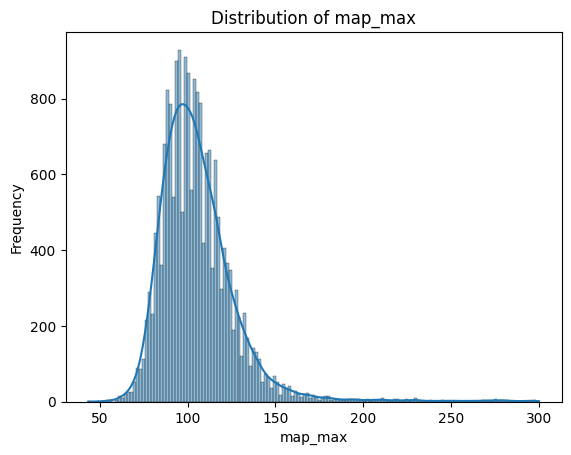

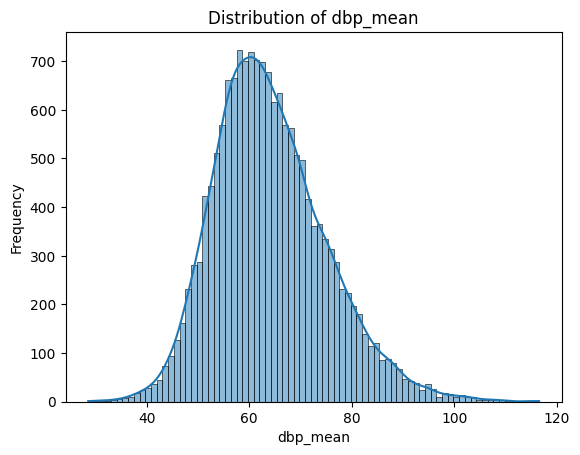

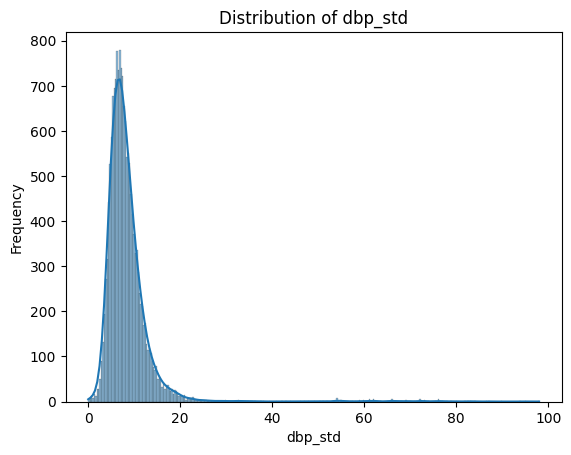

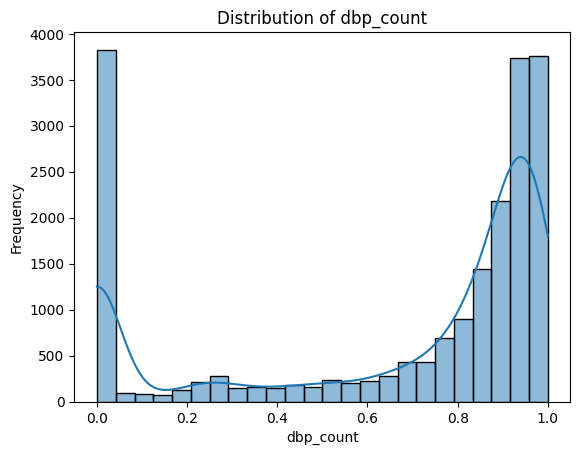

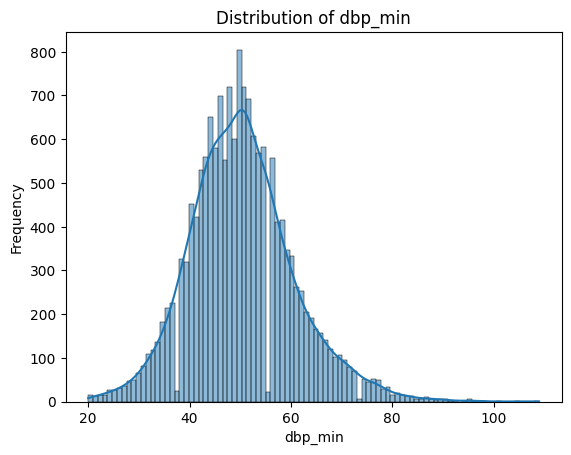

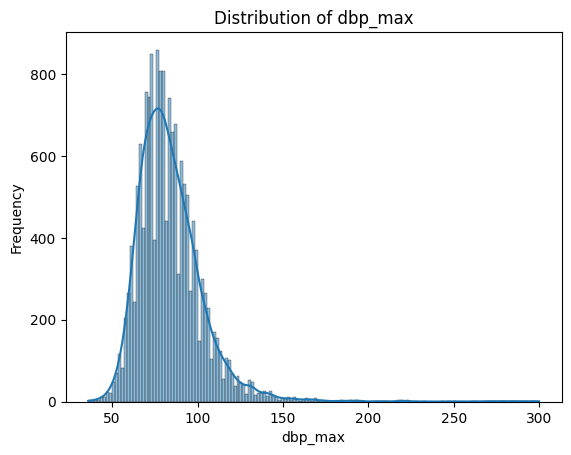

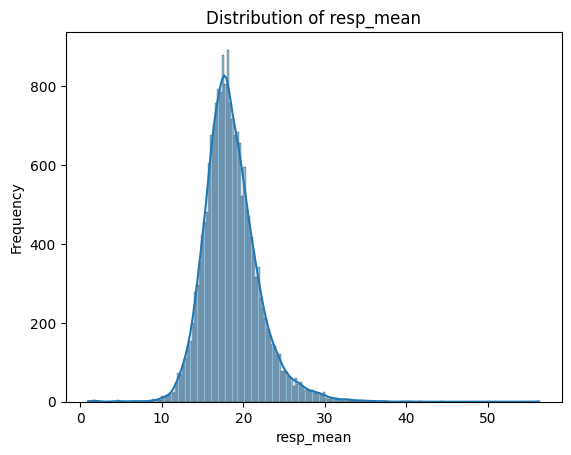

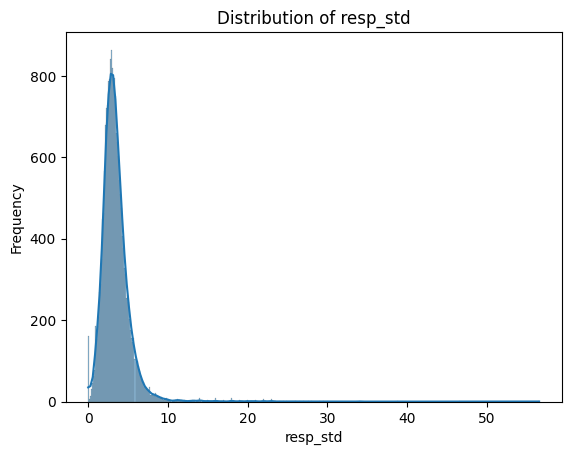

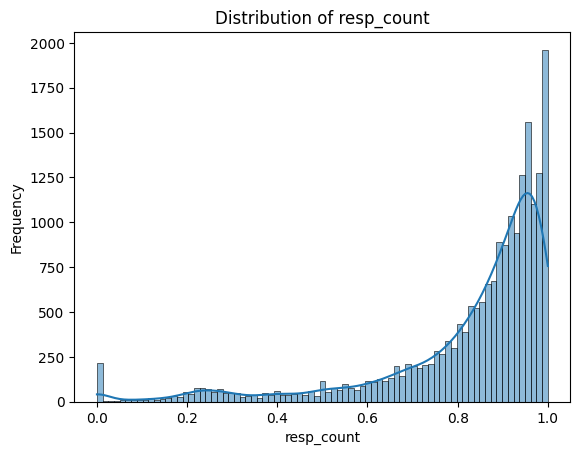

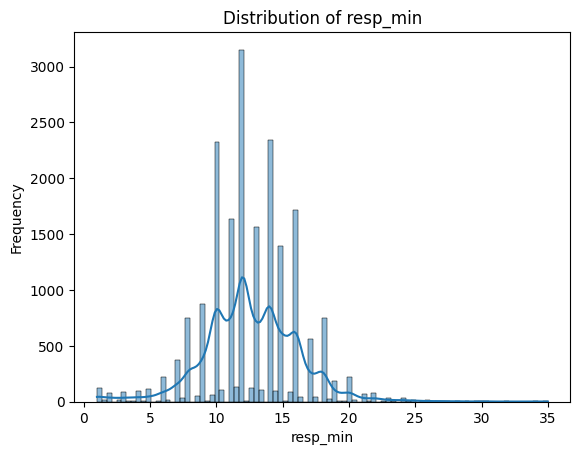

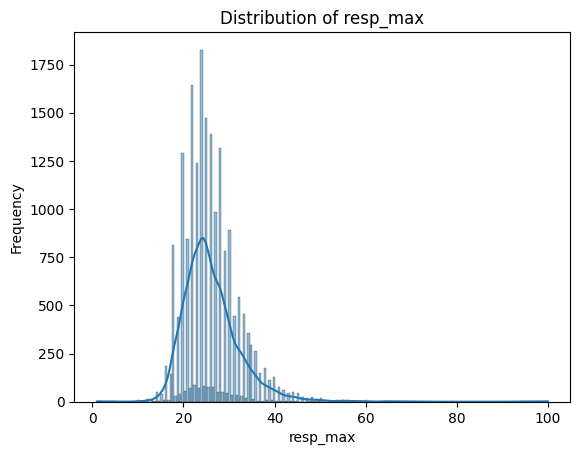

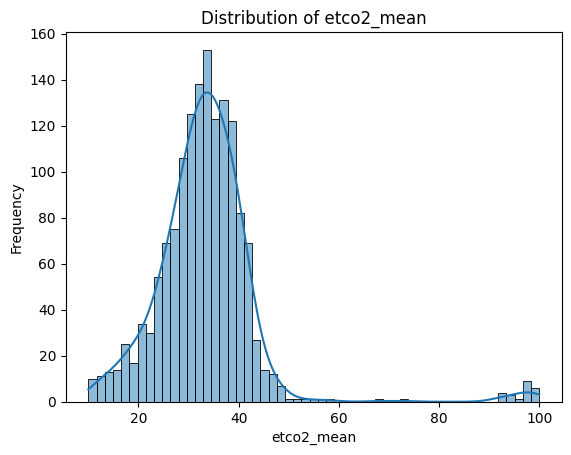

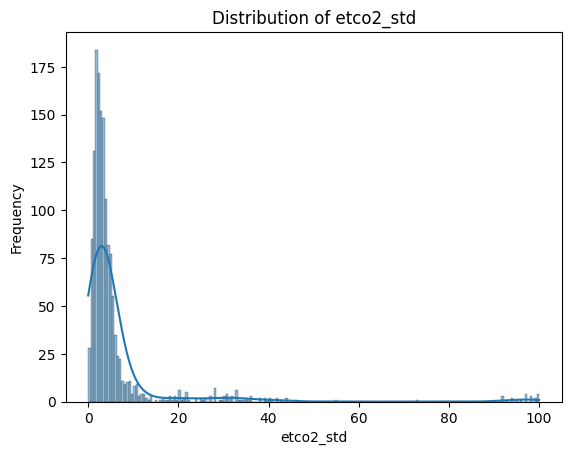

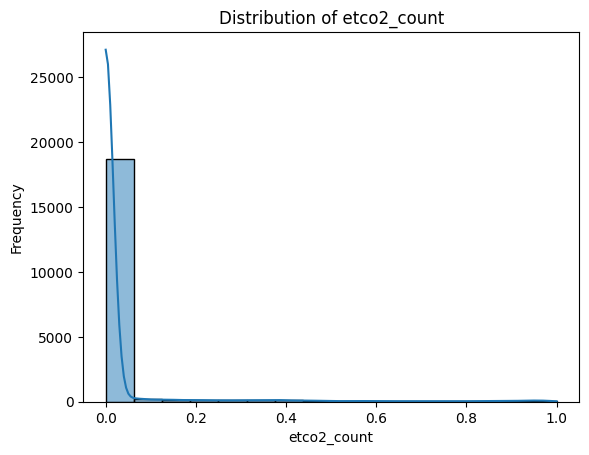

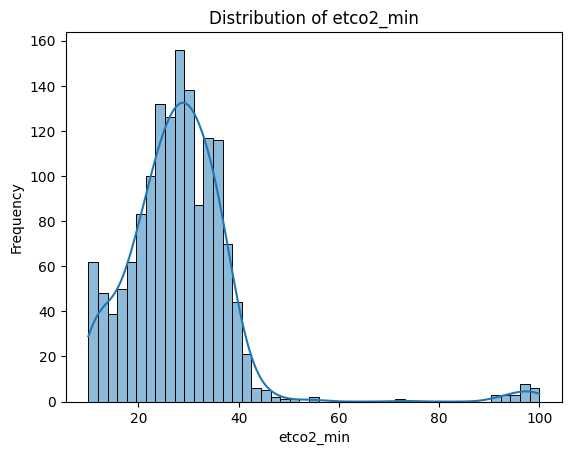

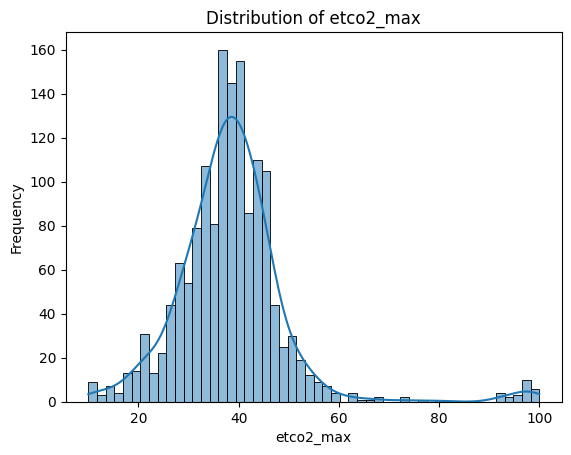

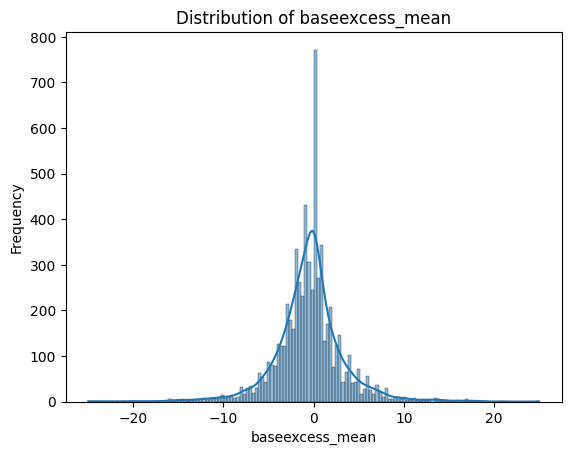

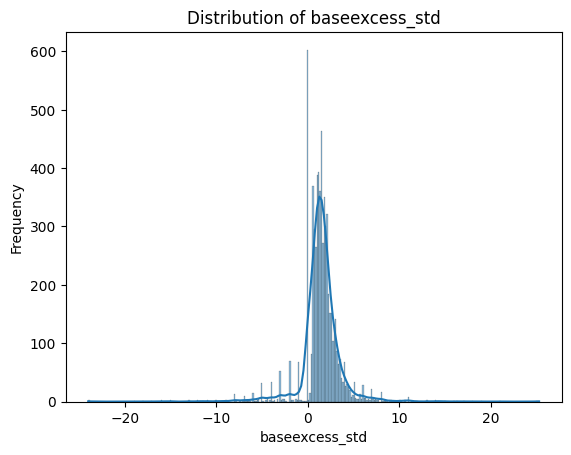

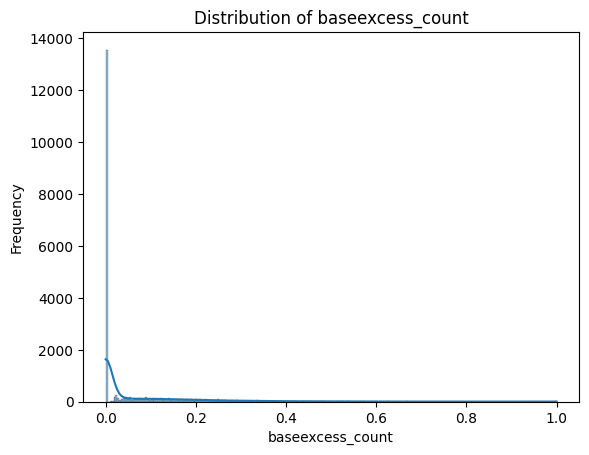

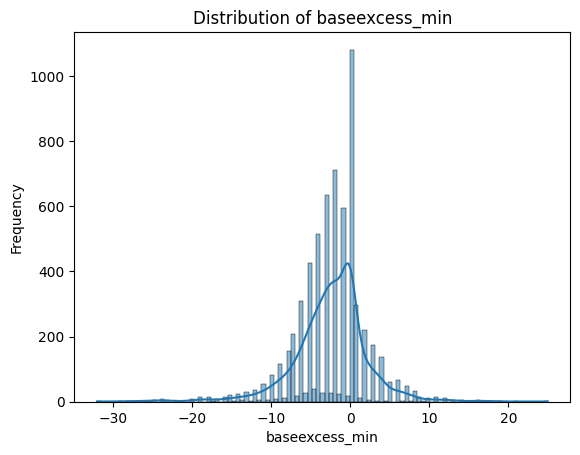

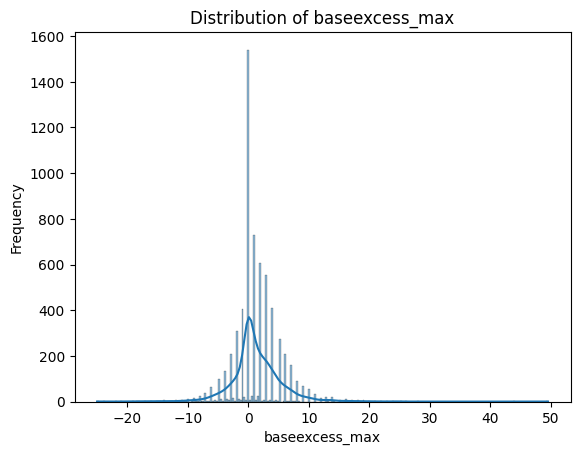

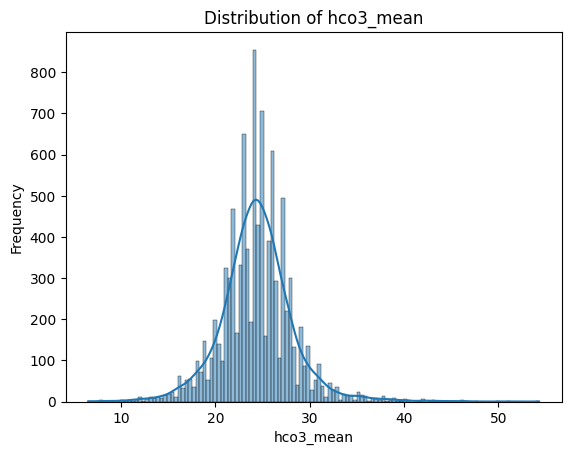

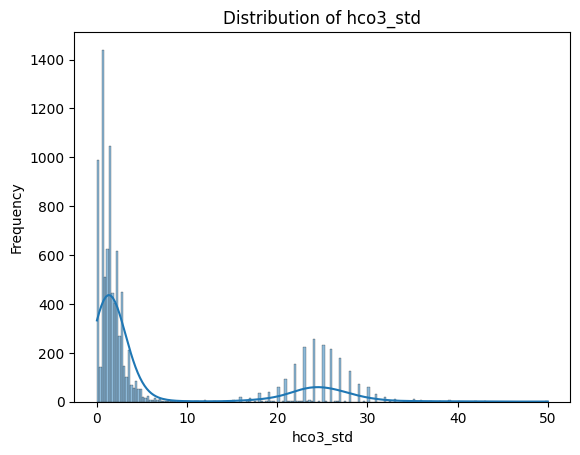

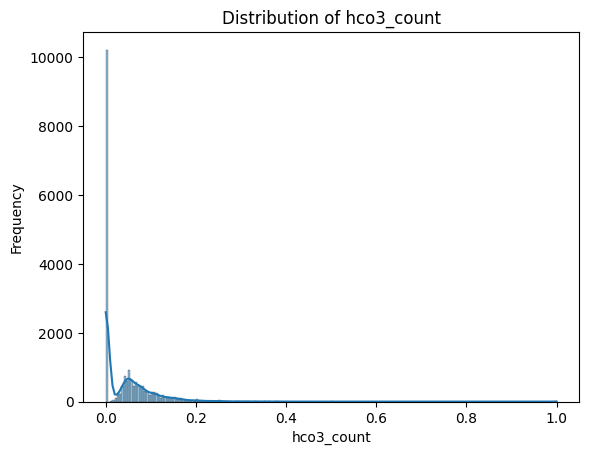

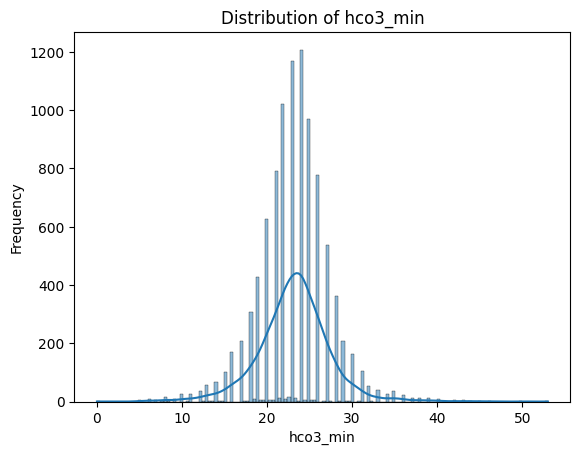

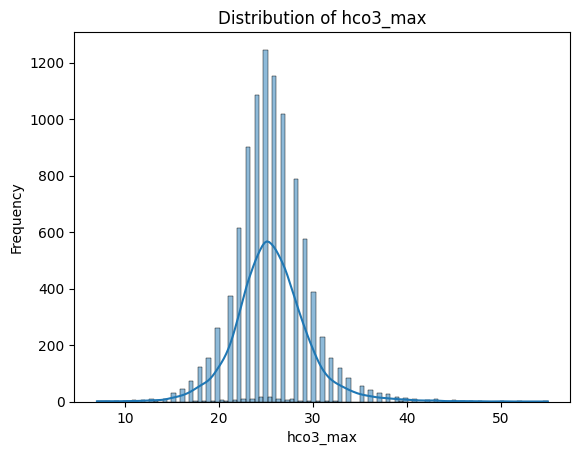

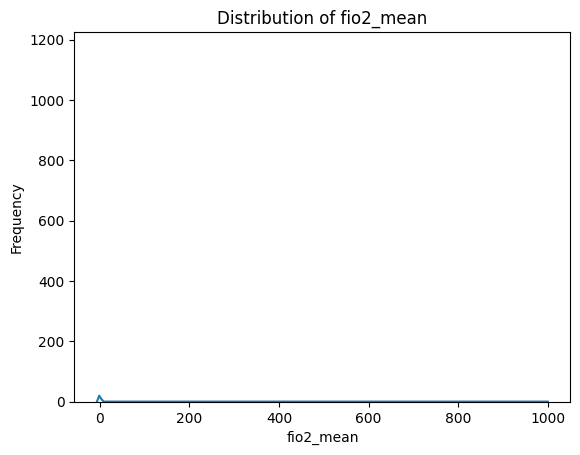

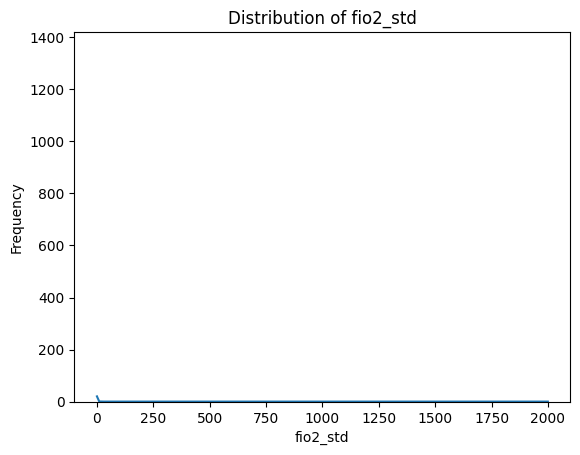

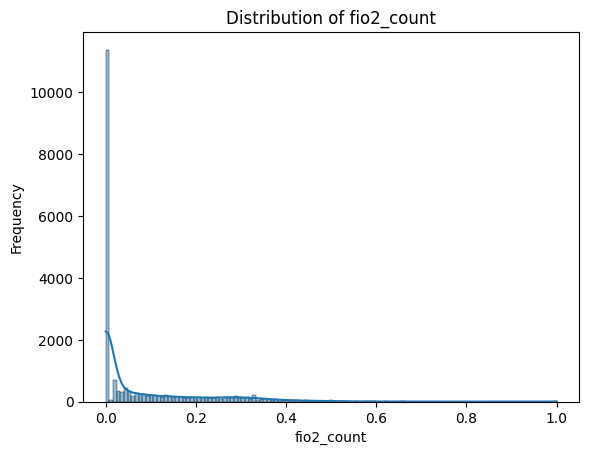

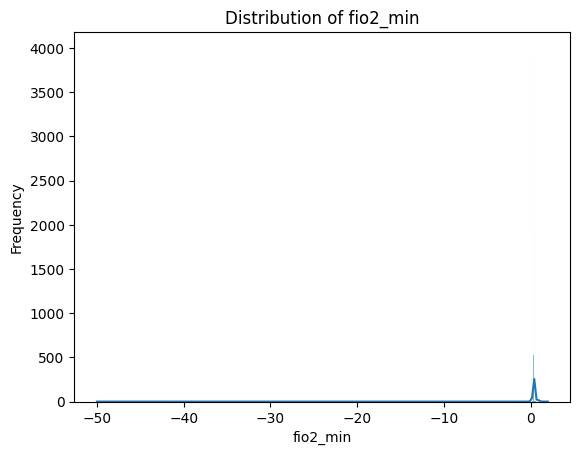

KeyboardInterrupt: ignored

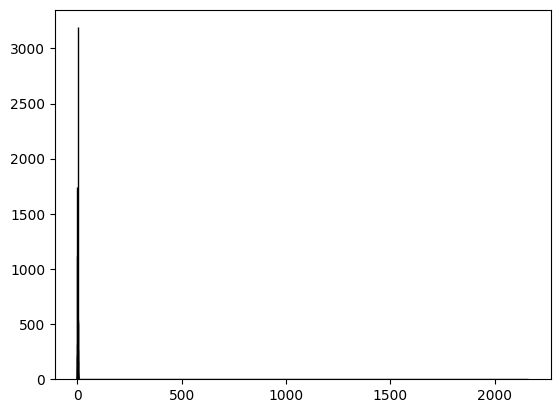

In [66]:
df =df_train
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming you have a DataFrame called 'df' with the features to analyze

# Describing the features
print(df.info())
print(df.describe())

# Inspecting the features distribution
for column in df.columns:
    plt.figure()
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



# Describing the features
print(df.info())
print(df.describe())

# Inspecting the features distribution and comparative analysis
for column1 in df.columns:
    for column2 in df.columns:
        if column1 != column2:
            plt.figure()

            # Plotting feature distribution
            sns.histplot(data=df, x=column1, kde=True, alpha=0.5)
            sns.histplot(data=df, x=column2, kde=True, alpha=0.5)

            plt.title(f'Distribution of {column1} and {column2}')
            plt.xlabel('Value')
            plt.ylabel('Frequency')
            plt.legend([column1, column2])
            plt.show()

            # Conducting hypothesis testing
            t_stat, p_value = stats.ttest_ind(df[column1], df[column2])

            # Interpret the results
            alpha = 0.05
            if p_value < alpha:
                print(f"There is a significant difference between {column1} and {column2}.")
            else:
                print(f"There is no significant difference between {column1} and {column2}.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 202 entries, Unnamed: 0 to label_value
dtypes: float64(200), int64(2)
memory usage: 30.8 MB
None
         Unnamed: 0       hr_mean        hr_std      hr_count        hr_min  \
count  20000.000000  19822.000000  19822.000000  20000.000000  19822.000000   
mean    9999.500000     83.747642      8.491406      0.881059     69.680027   
std     5773.647028     14.620389      5.973101      0.170638     13.870612   
min        0.000000     33.360000      0.000000      0.000000     20.000000   
25%     4999.750000     73.407366      5.546824      0.869565     60.000000   
50%     9999.500000     83.031010      7.525474      0.937500     69.000000   
75%    14999.250000     93.097209     10.196299      0.972973     78.000000   
max    19999.000000    174.037975    135.000000      1.000000    140.500000   

             hr_max    o2sat_mean     o2sat_std   o2sat_count     o2sat_min  \
count  19822.000000  19809.

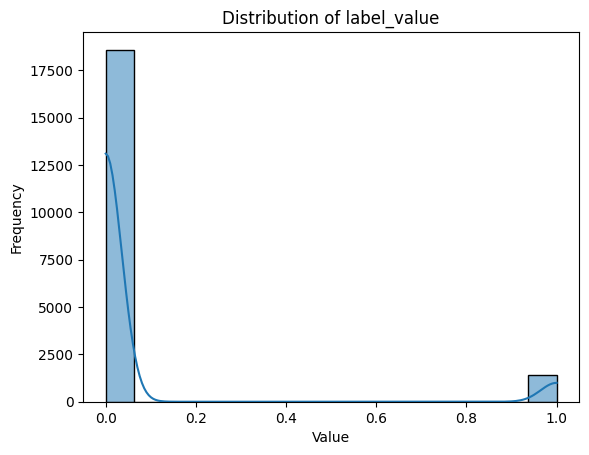

There is no significant difference between label_value and label_value.


MemoryError: ignored

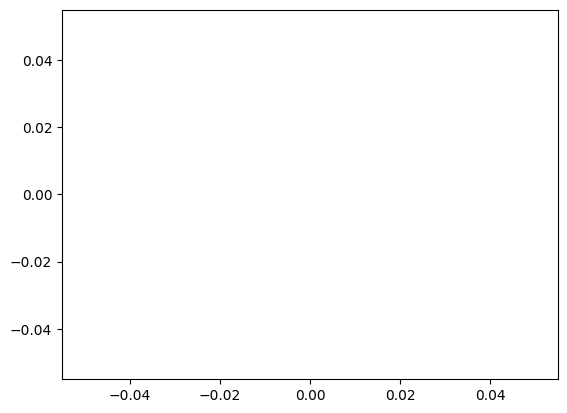

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming you have a DataFrame called 'df' with the features to analyze

# Describing the features
print(df.info())
print(df.describe())

# Calculate correlation matrix
corr_matrix = df.corr()

# Select top n features based on correlation with the target variable or domain knowledge
n = 10  # Adjust the value based on your preference
top_features = corr_matrix['label_value'].abs().nlargest(n).index

# Inspecting the features distribution and comparative analysis
for feature in top_features:
    plt.figure()

    # Plotting feature distribution
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

    # Conducting hypothesis testing with the target variable
    t_stat, p_value = stats.ttest_ind(df[feature], df['label_value'])

    # Interpret the results
    alpha = 0.05
    if p_value < alpha:
        print(f"There is a significant difference between {feature} and label_value.")
    else:
        print(f"There is no significant difference between {feature} and label_value.")


In [ ]:
import pandas as pd
from scipy.stats import shapiro
df = df_train
# Assuming you have a DataFrame called 'df'
normality_results = {}

# Iterate over each column in the DataFrame
for column in df.columns:
    # Skip columns with zero range
    if df[column].max() == df[column].min():
        print(f"Column '{column}' has zero range. Skipping the Shapiro-Wilk test.")
        continue
    
    # Perform the Shapiro-Wilk test for normality
    _, p_value = shapiro(df[column])
    
    # Store the result of the test
    normality_results[column] = p_value

col_norm = []
# Print the normality test results
for column, p_value in normality_results.items():
    if p_value > 0.05:
        print(f"Column '{column}' is normally distributed.")
        print("Correlation with label:", df[column].corr(df['label_value']))
        col_norm.append(column)

    #else:
        #print(f"Column '{column}' is not normally distributed.")


In [ ]:

correlation = df_train.corr()['label_value'].sort_values(ascending=False)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(correlation)

In [6]:
columns_to_drop = ['age_min','age_std','age_count','age_max',  
                   'gender_max','gender_min','gender_std', 'gender_count',
                   'unit1_min','unit1_std','unit1_count','unit1_max','unit1_mean', #
                   'unit2_min','unit2_std','unit2_count','unit2_max','unit2_mean',  #
                   'hospadmtime_min','hospadmtime_max','hospadmtime_std','hospadmtime_count',
                   'iculos_min','iculos_mean','iculos_std','iculos_count']
df_train.drop(columns = columns_to_drop, inplace=True)


# Create a dictionary to map the old column names to the new column names
new_column_names = {'age_mean': 'age',
                    'gender_mean': 'gender',
                    'hospadmtime_mean': 'hospadmtime',
                    'iculos_max': 'iculos' #le max unquement pour l'horraire 
                    }

# Rename the columns using the dictionary
df_train = df_train.rename(columns=new_column_names)

columns_df_selected_raph = ['HR', 'O2Sat', 'Temp', 'SBP', 'DBP', 'Resp',
               'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'Creatinine', 'Bilirubin_direct',
              'Glucose', 'Lactate',  'Potassium',
              'Bilirubin_total', 'TroponinI', 'Hgb', 'WBC',
              'Fibrinogen', 'Platelets', 'Age', 'Gender',
               'ICULOS', 'label']
columns_df_selected_raph = [x.lower() for x in columns_df_selected_raph]
colmns_selected =[]

for column_to_select in columns_df_selected_raph:
  for columns in df_train.columns:

    if column_to_select in columns:
      colmns_selected.append(columns)

#colmns_selected

df_train = df_train[colmns_selected]

too_much_nan = []
for col in df_train.columns:
  print(col,df_train[col].isna().sum())
  if df_train[col].isna().sum()>=10000:
    too_much_nan.append(col)

#too_much_nan

df_train.drop(columns = too_much_nan, inplace=True)

hr_mean 178
hr_std 178
hr_count 0
hr_min 178
hr_max 178
o2sat_mean 191
o2sat_std 191
o2sat_count 0
o2sat_min 191
o2sat_max 191
temp_mean 353
temp_std 353
temp_count 0
temp_min 353
temp_max 353
sbp_mean 328
sbp_std 328
sbp_count 0
sbp_min 328
sbp_max 328
dbp_mean 3756
dbp_std 3756
dbp_count 0
dbp_min 3756
dbp_max 3756
resp_mean 215
resp_std 215
resp_count 0
resp_min 215
resp_max 215
hco3_mean 10221
hco3_std 10221
hco3_count 0
hco3_min 10221
hco3_max 10221
fio2_mean 11371
fio2_std 11371
fio2_count 0
fio2_min 11371
fio2_max 11371
ph_mean 10823
ph_std 10823
ph_count 0
ph_min 10823
ph_max 10823
alkalinephos_mean 13232
alkalinephos_std 13232
alkalinephos_count 0
alkalinephos_min 13232
alkalinephos_max 13232
phosphate_mean 6264
phosphate_std 6264
phosphate_count 0
phosphate_min 6264
phosphate_max 6264
paco2_mean 11116
paco2_std 11116
paco2_count 0
paco2_min 11116
paco2_max 11116
sao2_mean 13676
sao2_std 13676
sao2_count 0
sao2_min 13676
sao2_max 13676
creatinine_mean 1303
creatinine_std 1303


features exploration

In [12]:
df_train.columns

Index(['hr_mean', 'hr_std', 'hr_count', 'hr_min', 'hr_max', 'o2sat_mean',
       'o2sat_std', 'o2sat_count', 'o2sat_min', 'o2sat_max', 'temp_mean',
       'temp_std', 'temp_count', 'temp_min', 'temp_max', 'sbp_mean', 'sbp_std',
       'sbp_count', 'sbp_min', 'sbp_max', 'dbp_mean', 'dbp_std', 'dbp_count',
       'dbp_min', 'dbp_max', 'resp_mean', 'resp_std', 'resp_count', 'resp_min',
       'resp_max', 'hco3_count', 'fio2_count', 'ph_count',
       'alkalinephos_count', 'phosphate_mean', 'phosphate_std',
       'phosphate_count', 'phosphate_min', 'phosphate_max', 'paco2_count',
       'sao2_count', 'creatinine_mean', 'creatinine_std', 'creatinine_count',
       'creatinine_min', 'creatinine_max', 'bilirubin_direct_count',
       'glucose_mean', 'glucose_std', 'glucose_count', 'glucose_min',
       'glucose_max', 'lactate_count', 'potassium_mean', 'potassium_std',
       'potassium_count', 'potassium_min', 'potassium_max',
       'bilirubin_total_count', 'troponini_count', 'hgb_mean', 'h

hr, resp,o2sat, sao2_count (enlevé le reste parce que trop de nan values), 

In [22]:
import matplotlib.pyplot as plt

def visualize_feature_importance(df, target_column,N):
    # Select the feature columns
    feature_columns = df.columns.drop(target_column)

    # Calculate the correlation between features and target
    correlations = df[feature_columns].corrwith(df[target_column])

    # Sort the features based on correlation values
    sorted_features = correlations.abs().sort_values(ascending=False)

    # Select the top N features with high correlation
    top_features = sorted_features[:N]  # Replace N with the desired number of top features to visualize

    # Plot the feature importance
    fig, ax = plt.subplots(figsize=(8, 6))
    top_features.plot(kind='bar', ax=ax)
    ax.set(title='Feature Importance', xlabel='Features', ylabel='Correlation')
    plt.xticks(rotation=90)
    plt.show()

    # Plot the relationship between each selected feature and the target variable
    for feature in top_features.index:
        plt.figure(figsize=(8, 6))
        plt.scatter(df[feature], df[target_column])
        plt.title(f'{feature} vs {target_column}')
        plt.xlabel(feature)
        plt.ylabel(target_column)
        plt.show()


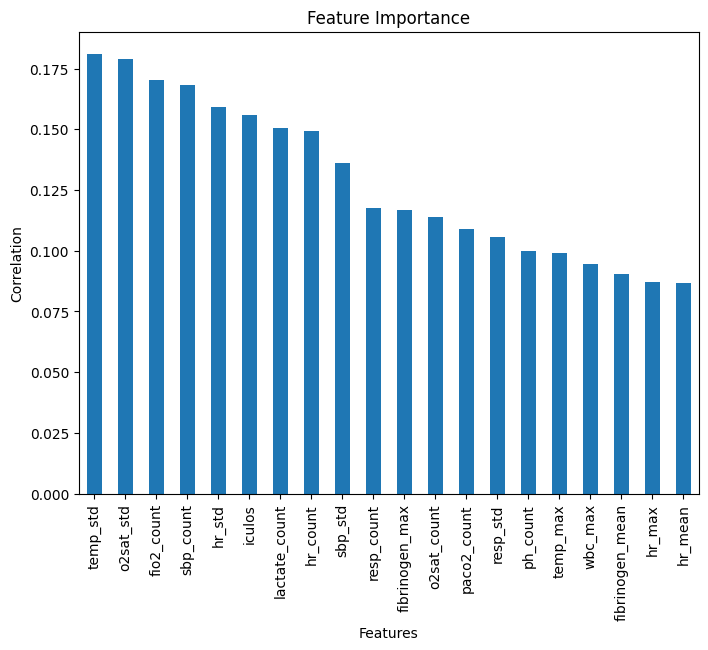

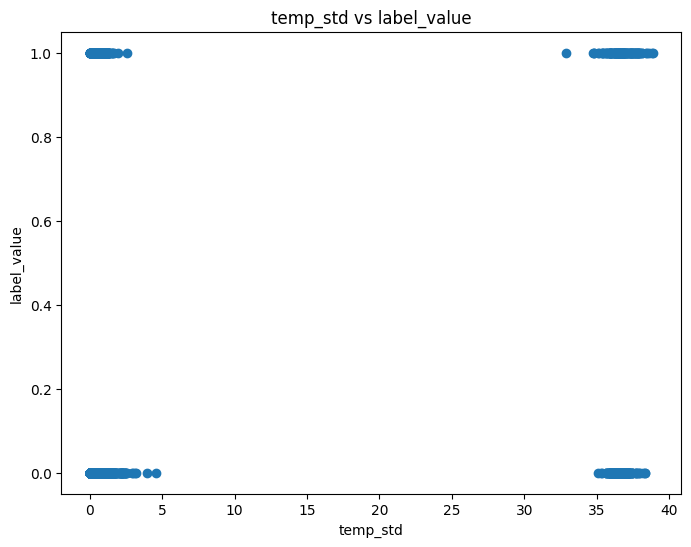

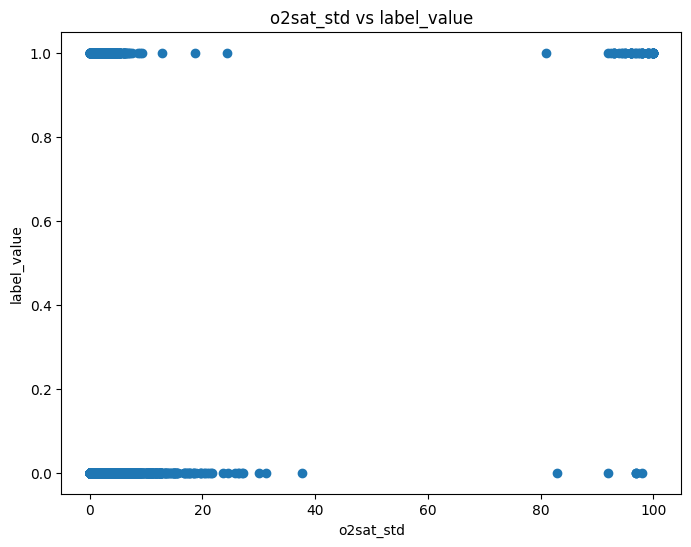

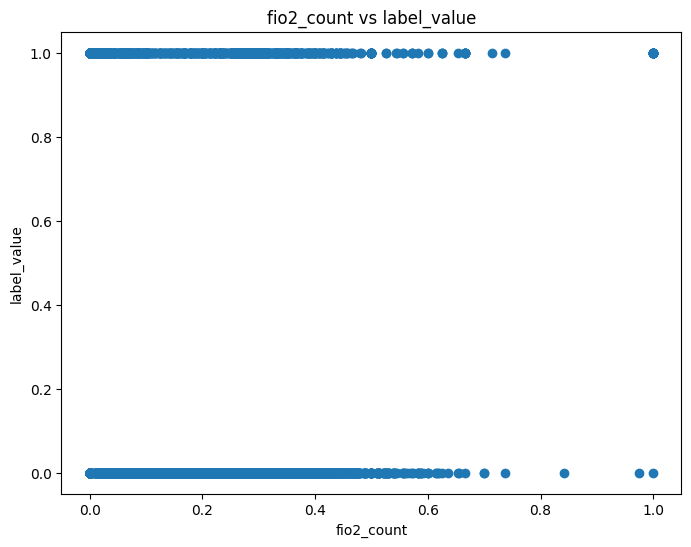

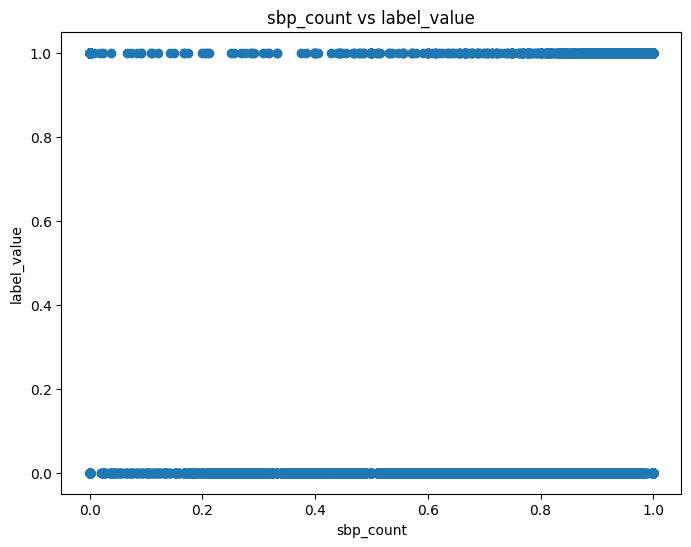

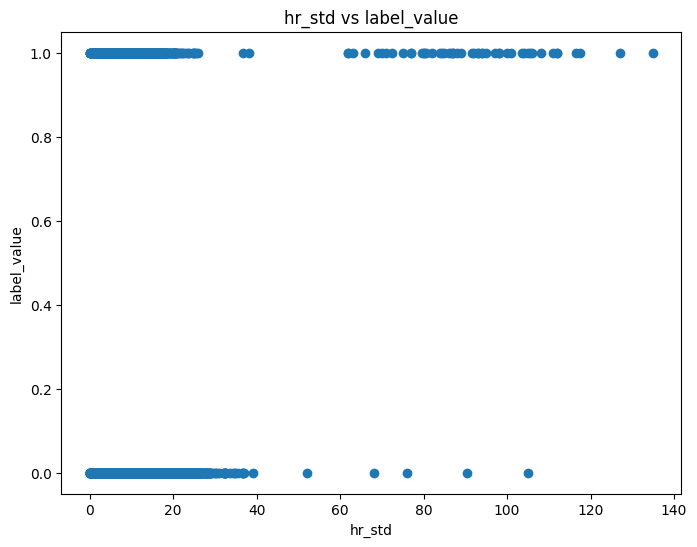

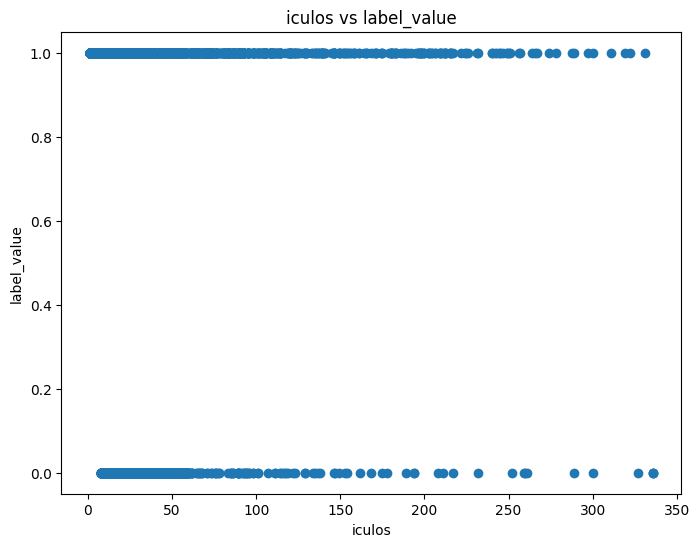

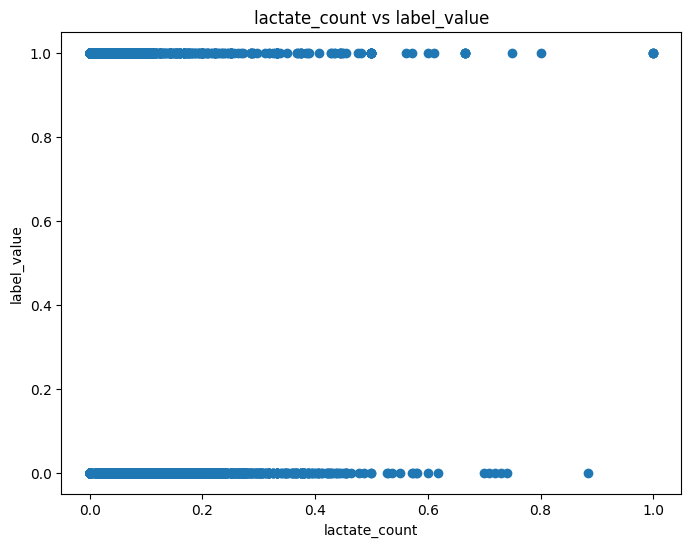

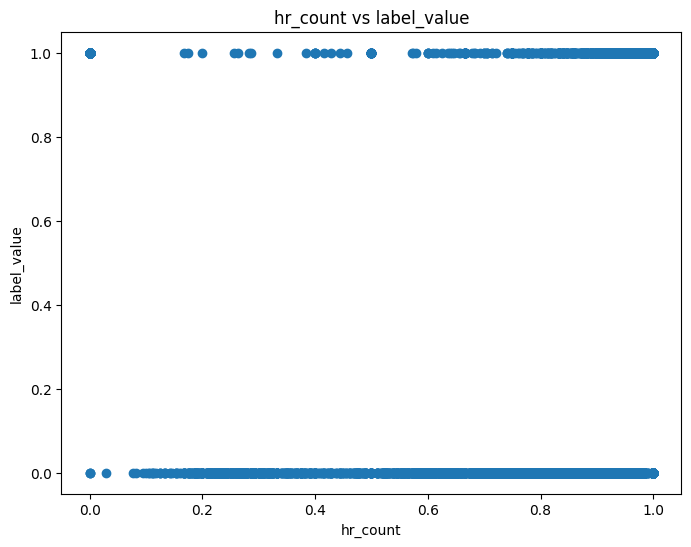

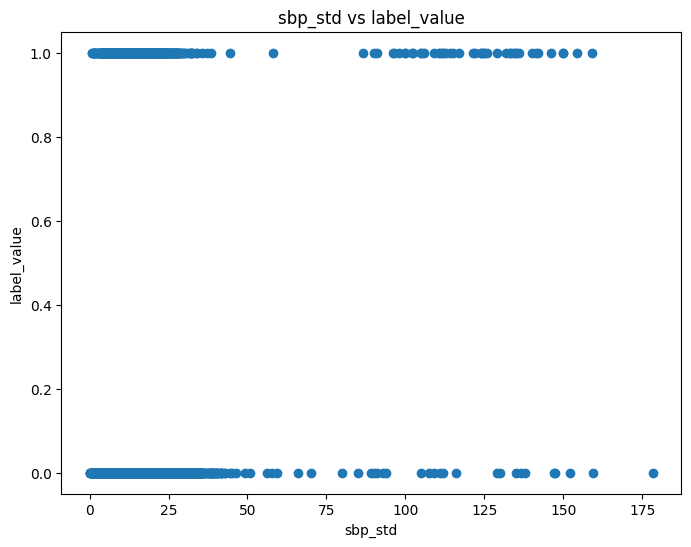

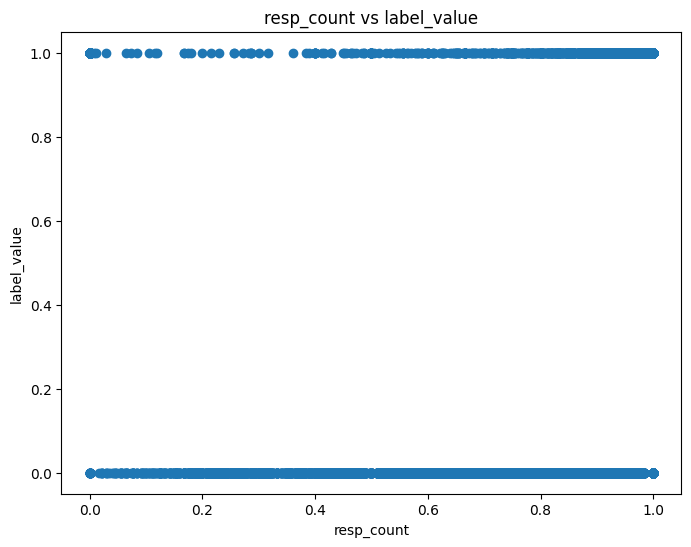

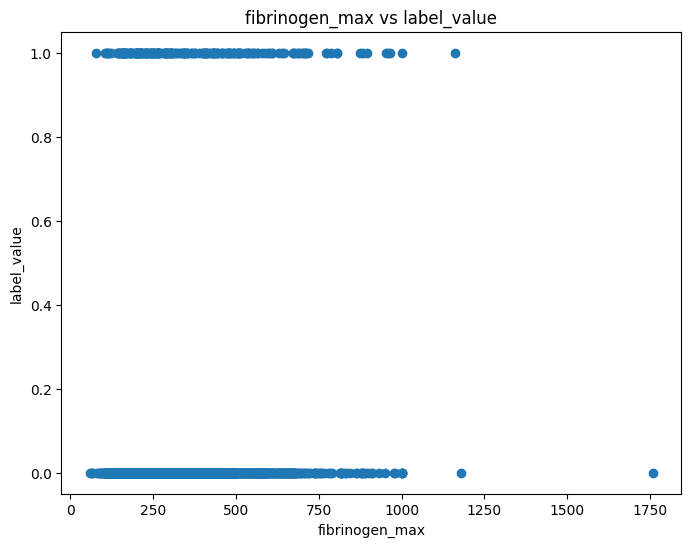

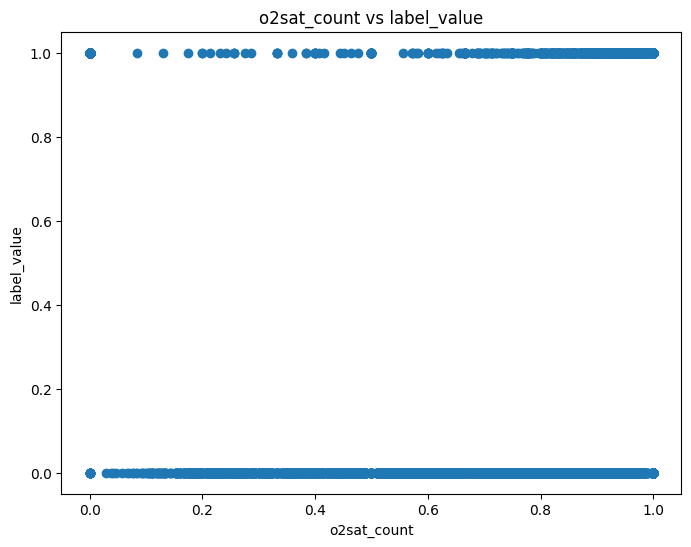

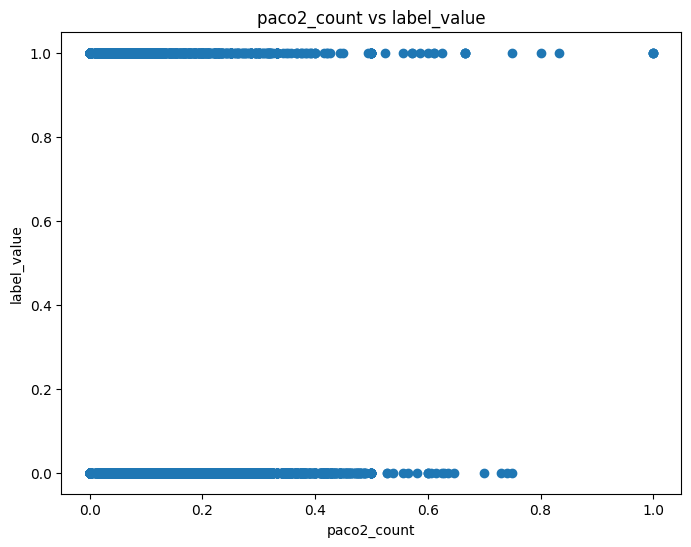

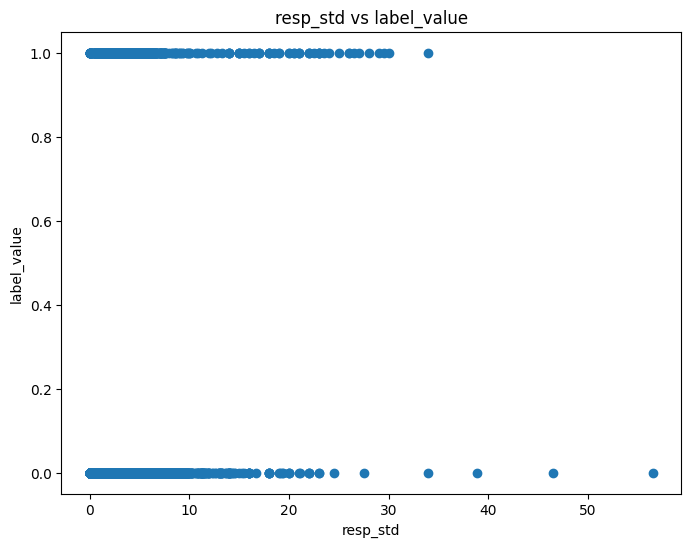

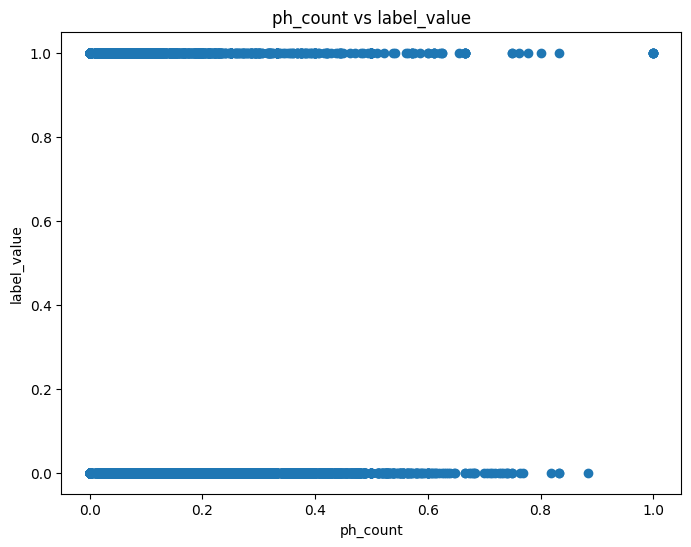

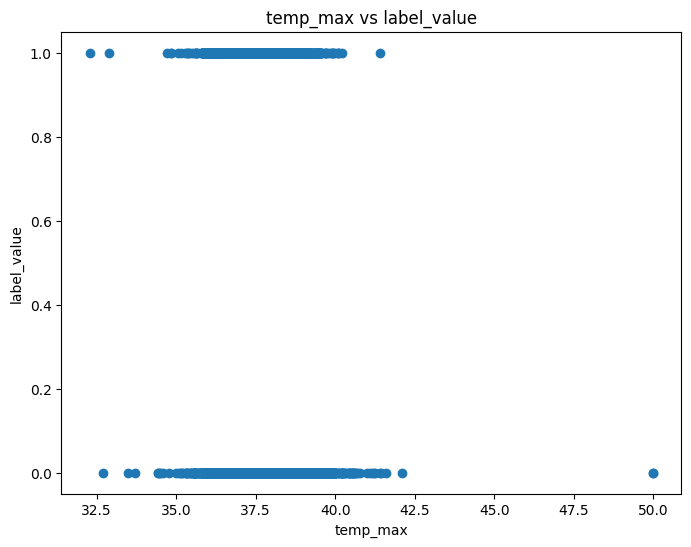

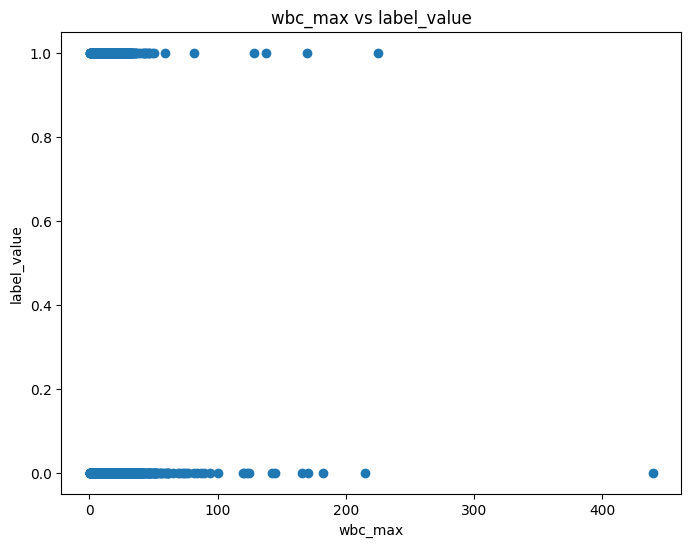

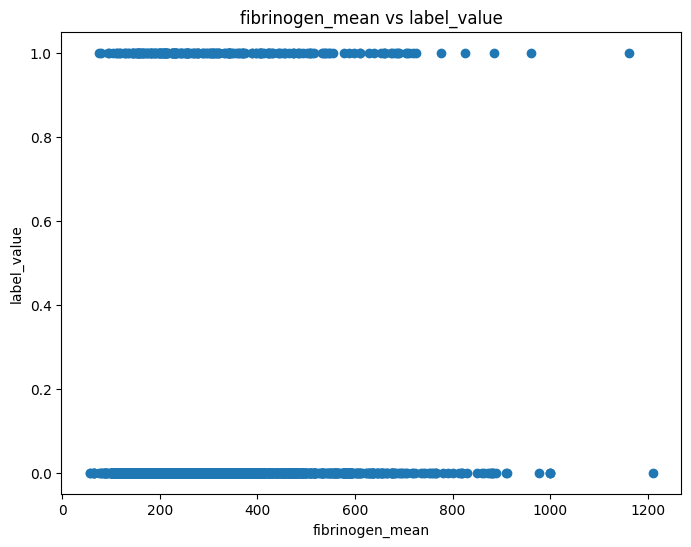

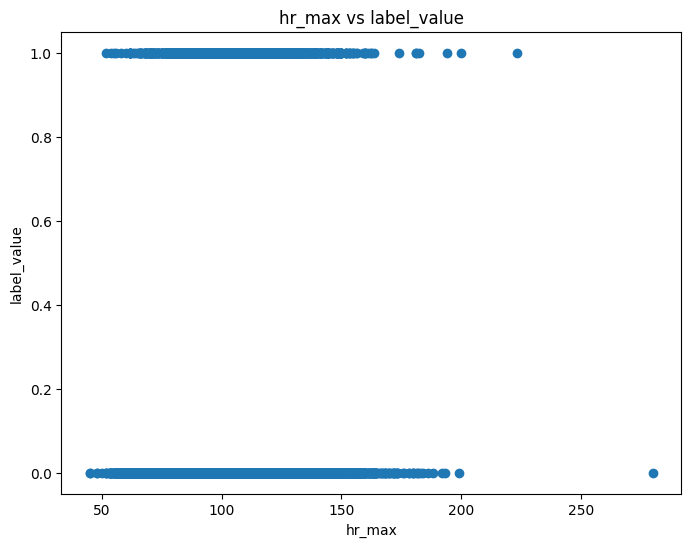

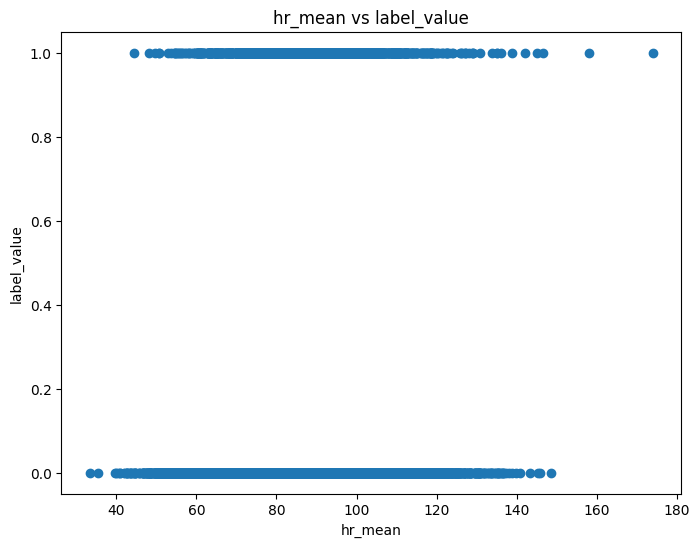

In [23]:
visualize_feature_importance(df_train, 'label_value',20)


Now lets fill the nan values by using knn

In [7]:
df_filled_values = df_train

In [8]:
from sklearn.impute import KNNImputer
from numpy import isnan

In [9]:
x = df_filled_values.drop('label_value', axis=1)
x_colmns = x.columns
print('Missing: %d' % x.isna().sum().sum())
x

Missing: 77624


,hr_mean,hr_std,hr_count,hr_min,hr_max,o2sat_mean,o2sat_std,o2sat_count,o2sat_min,o2sat_max,...,wbc_max,fibrinogen_count,platelets_mean,platelets_std,platelets_count,platelets_min,platelets_max,age,gender,iculos
0,60.954545,8.144395,0.956522,54.0,94.0,97.000000,2.138090,0.956522,94.0,100.0,...,11.0,0.0,158.000000,158.000000,0.043478,158.0,158.0,75.91,0.0,23.0
1,87.875000,6.930164,0.960000,79.0,101.0,100.000000,0.000000,0.960000,100.0,100.0,...,12.5,0.0,205.000000,28.284271,0.080000,185.0,225.0,65.79,1.0,26.0
2,74.828571,7.875822,0.972222,60.0,89.0,96.161290,2.252358,0.861111,92.0,100.0,...,3.5,0.0,65.000000,65.000000,0.027778,65.0,65.0,52.88,1.0,38.0
3,76.559524,10.748909,0.933333,58.0,101.0,96.583333,1.521860,0.933333,94.0,99.0,...,11.6,0.0,193.000000,70.710678,0.044444,143.0,243.0,49.52,1.0,48.0
4,98.613636,5.520377,0.916667,91.0,107.0,95.340909,1.768685,0.916667,92.0,99.0,...,10.8,0.0,170.000000,170.000000,0.041667,170.0,170.0,73.00,1.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,104.407407,10.936914,0.931034,84.0,121.0,97.796296,1.766457,0.931034,95.0,100.0,...,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,59.71,1.0,29.0
19996,63.714286,6.153665,0.976744,53.0,81.0,99.642857,0.655983,0.976744,97.0,100.0,...,2.3,0.0,120.000000,120.000000,0.023256,120.0,120.0,65.83,1.0,43.0
19997,74.928571,6.082311,1.000000,65.0,84.0,98.214286,0.611250,1.000000,97.0,99.0,...,6.5,0.0,184.000000,184.000000,0.071429,184.0,184.0,79.42,0.0,15.0
19998,83.666667,10.030163,0.804878,60.0,110.0,99.484848,1.148945,0.804878,96.0,100.0,...,14.3,0.0,166.666667,27.934447,0.073171,142.0,197.0,38.75,1.0,42.0


In [10]:

y = df_filled_values['label_value']
imputer = KNNImputer()
imputer.fit(x)
new_x = imputer.transform(x)
new_x_df = pd.DataFrame(new_x, columns = x_colmns)
print('Missing: %d' % new_x_df.isna().sum().sum())
new_x_df

Missing: 0


,hr_mean,hr_std,hr_count,hr_min,hr_max,o2sat_mean,o2sat_std,o2sat_count,o2sat_min,o2sat_max,...,wbc_max,fibrinogen_count,platelets_mean,platelets_std,platelets_count,platelets_min,platelets_max,age,gender,iculos
0,60.954545,8.144395,0.956522,54.0,94.0,97.000000,2.138090,0.956522,94.0,100.0,...,11.00,0.0,158.000000,158.000000,0.043478,158.0,158.0,75.91,0.0,23.0
1,87.875000,6.930164,0.960000,79.0,101.0,100.000000,0.000000,0.960000,100.0,100.0,...,12.50,0.0,205.000000,28.284271,0.080000,185.0,225.0,65.79,1.0,26.0
2,74.828571,7.875822,0.972222,60.0,89.0,96.161290,2.252358,0.861111,92.0,100.0,...,3.50,0.0,65.000000,65.000000,0.027778,65.0,65.0,52.88,1.0,38.0
3,76.559524,10.748909,0.933333,58.0,101.0,96.583333,1.521860,0.933333,94.0,99.0,...,11.60,0.0,193.000000,70.710678,0.044444,143.0,243.0,49.52,1.0,48.0
4,98.613636,5.520377,0.916667,91.0,107.0,95.340909,1.768685,0.916667,92.0,99.0,...,10.80,0.0,170.000000,170.000000,0.041667,170.0,170.0,73.00,1.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,104.407407,10.936914,0.931034,84.0,121.0,97.796296,1.766457,0.931034,95.0,100.0,...,15.88,0.0,383.700000,87.926198,0.000000,370.6,396.8,59.71,1.0,29.0
19996,63.714286,6.153665,0.976744,53.0,81.0,99.642857,0.655983,0.976744,97.0,100.0,...,2.30,0.0,120.000000,120.000000,0.023256,120.0,120.0,65.83,1.0,43.0
19997,74.928571,6.082311,1.000000,65.0,84.0,98.214286,0.611250,1.000000,97.0,99.0,...,6.50,0.0,184.000000,184.000000,0.071429,184.0,184.0,79.42,0.0,15.0
19998,83.666667,10.030163,0.804878,60.0,110.0,99.484848,1.148945,0.804878,96.0,100.0,...,14.30,0.0,166.666667,27.934447,0.073171,142.0,197.0,38.75,1.0,42.0


In [38]:
from joblib import dump
# Save the model to a file
dump(imputer, 'knn_imputer_model.joblib')

['knn_imputer_model.joblib']

preprocess test

In [ ]:
path = test_path
first_file = "patient_0.psv"

# Extract the numeric part of the first file name
first_number = int(''.join(filter(str.isdigit, first_file)))

file_list = [file for file in os.listdir(path) if file.endswith('.psv')]
# Sort the file list based on the numeric part of the file names

sorted_file_list = sorted(file_list, key=lambda x: int(''.join(filter(str.isdigit, x))))

df = combine_dataframes(path,sorted_file_list)


df.to_csv('combined_data_test.csv', index=True)

In [11]:
df = pd.read_csv('/content/combined_data_test.csv')



In [ ]:
#preprocess test

In [12]:
def preprocess(df,imputer):
  """  first_file = "patient_0.psv"

    # Extract the numeric part of the first file name
    first_number = int(''.join(filter(str.isdigit, first_file)))

    file_list = [file for file in os.listdir(path) if file.endswith('.psv')]
    # Sort the file list based on the numeric part of the file names

    sorted_file_list = sorted(file_list, key=lambda x: int(''.join(filter(str.isdigit, x))))

    df = combine_dataframes(path,sorted_file_list)


    df.to_csv('combined_data_{'+path+'}.csv', index=True)"""

  columns_to_drop = ['age_min','age_std','age_count','age_max',
                   'gender_max','gender_min','gender_std', 'gender_count',
                   'unit1_min','unit1_std','unit1_count','unit1_max','unit1_mean',
                   'unit2_min','unit2_std','unit2_count','unit2_max','unit2_mean',
                   'hospadmtime_min','hospadmtime_max','hospadmtime_std','hospadmtime_count',
                   'iculos_min','iculos_mean','iculos_std','iculos_count']
  df.drop(columns = columns_to_drop, inplace=True)
  # Create a dictionary to map the old column names to the new column names
  new_column_names = {'age_mean': 'age',
                      'gender_mean': 'gender',
                      'hospadmtime_mean': 'hospadmtime',
                      'iculos_max': 'iculos' 
                      }

  # Rename the columns using the dictionary
  df = df.rename(columns=new_column_names)
  columns_df_selected_first = ['HR', 'O2Sat', 'Temp', 'SBP', 'DBP', 'Resp',
               'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'Creatinine', 'Bilirubin_direct',
              'Glucose', 'Lactate',  'Potassium',
              'Bilirubin_total', 'TroponinI', 'Hgb', 'WBC',
              'Fibrinogen', 'Platelets', 'Age', 'Gender',
               'ICULOS', 'label']
  columns_df_selected_first = [x.lower() for x in columns_df_selected_first]
  colmns_selected =[]

  for column_to_select in columns_df_selected_first:
    for columns in df.columns:
      if column_to_select in columns:
        colmns_selected.append(columns)
  df = df[colmns_selected]



  too_much_nan = ['hco3_mean', 'hco3_std', 'hco3_min', 'hco3_max', 'fio2_mean',
                  'fio2_std', 'fio2_min', 'fio2_max', 'ph_mean', 'ph_std', 
                  'ph_min', 'ph_max', 'alkalinephos_mean', 'alkalinephos_std', 
                  'alkalinephos_min', 'alkalinephos_max', 'paco2_mean', 
                  'paco2_std', 'paco2_min', 'paco2_max', 'sao2_mean', 
                  'sao2_std', 'sao2_min', 'sao2_max', 'bilirubin_direct_mean',
                  'bilirubin_direct_std', 'bilirubin_direct_min', 'bilirubin_direct_max', 
                  'lactate_mean', 'lactate_std', 'lactate_min', 'lactate_max', 
                  'bilirubin_total_mean', 'bilirubin_total_std', 'bilirubin_total_min', 
                  'bilirubin_total_max', 'troponini_mean', 'troponini_std', 
                  'troponini_min', 'troponini_max', 'fibrinogen_mean', 
                  'fibrinogen_std', 'fibrinogen_min', 'fibrinogen_max']
  df.drop(columns = too_much_nan, inplace=True)

  x = df.drop('label_value', axis=1)
  x_colmns = x.columns
  print('Missing: %d' % x.isna().sum().sum())
  y = df['label_value']
  #imputer = KNNImputer()
  #imputer.fit(x)
  new_x = imputer.transform(x)
  new_x_df = pd.DataFrame(new_x, columns = x_colmns)
  print('Missing: %d' % new_x_df.isna().sum().sum())
  return new_x_df, y


In [13]:
from joblib import load

# Load the saved KNNImputer model from a file
imputer = load('/content/knn_imputer_model.joblib')

In [14]:
X_test, y_test = preprocess(df,imputer)

Missing: 38892
Missing: 0


## models

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Prepare the data
X_train = new_x_df
y_train = y

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose an algorithm and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9425
Precision: 0.7842465753424658
Recall: 0.3090418353576248
F1-Score: 0.44336882865440463
Confusion Matrix:
[[9196   63]
 [ 512  229]]


RandomForestClassifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Choose an algorithm and train the model
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model_RFC.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Random Forest Classifier")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Random Forest Classifier
Accuracy: 0.9615
Precision: 0.8920704845814978
Recall: 0.5465587044534413
F1-Score: 0.6778242677824268
Confusion Matrix:
[[9210   49]
 [ 336  405]]


In [50]:
from sklearn.ensemble import GradientBoostingClassifier

# Choose an algorithm and train the model
model_GBC = GradientBoostingClassifier()
model_GBC.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model_GBC.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Gradient Boosting Classifier")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Gradient Boosting Classifier
Accuracy: 0.9638
Precision: 0.8623326959847036
Recall: 0.6086369770580297
F1-Score: 0.7136075949367089
Confusion Matrix:
[[9187   72]
 [ 290  451]]


In [51]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
#save the prediction
# Create a DataFrame with 'id' and 'prediction' columns
data = {'id': ['patient_{}'.format(i) for i in range(len(y_pred))],
        'prediction': y_pred}
df = pd.DataFrame(data)

# Save the DataFrame as a CSV file
df.to_csv('predictions.csv', index=False)

In [55]:
df

,id,prediction
0,patient_0,0
1,patient_1,0
2,patient_2,0
3,patient_3,0
4,patient_4,0
...,...,...
9995,patient_9995,0
9996,patient_9996,0
9997,patient_9997,0
9998,patient_9998,0


In [134]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
import joblib


# Save the trained model
joblib.dump(model, 'model_LogisticRegression.pkl')
joblib.dump(model_RFC, 'model_RandomForestClassifier.pkl')
joblib.dump(model_GBC, 'model_model_GBC.pkl') 

'''# Load the saved model
loaded_model = joblib.load('model_filename.pkl')

# Use the loaded model for predictions
y_pred = loaded_model.predict(X_test)
'''

"# Load the saved model\nloaded_model = joblib.load('model_filename.pkl')\n\n# Use the loaded model for predictions\ny_pred = loaded_model.predict(X_test)\n"

In [48]:
#SVM
from sklearn.svm import SVC

# Choose an algorithm and train the model
model = SVC()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Support Vector Machine (SVM) Classifier")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Support Vector Machine (SVM) Classifier
Accuracy: 0.941
Precision: 0.847926267281106
Recall: 0.2483130904183536
F1-Score: 0.384133611691023
Confusion Matrix:
[[9226   33]
 [ 557  184]]


In [151]:
import importlib.metadata

# Liste des packages importés spécifiquement dans votre code
imported_packages = ['tarfile', 'os', 'pandas','sklearn',"joblib","numpy","matplotlib"]

# Chemin du fichier texte pour enregistrer les versions des packages
file_path = '/content/package_versions.txt'

# Ouvrez le fichier en mode écriture
with open(file_path, 'w') as f:
    # Parcourez les packages importés
    for package_name in imported_packages:
        try:
            # Obtenez la version du package
            package_version = importlib.metadata.version(package_name)
            
            # Écrivez le nom et la version du package dans le fichier avec un '/'
            f.write(f"/{package_name}=={package_version}\n")
        except importlib.metadata.PackageNotFoundError:
            # Le package n'a pas été trouvé, ignorez-le ou faites quelque chose d'autre
            pass


##Post Analysis

In [17]:
new_x_df.columns

Index(['hr_mean', 'hr_std', 'hr_count', 'hr_min', 'hr_max', 'o2sat_mean',
       'o2sat_std', 'o2sat_count', 'o2sat_min', 'o2sat_max', 'temp_mean',
       'temp_std', 'temp_count', 'temp_min', 'temp_max', 'sbp_mean', 'sbp_std',
       'sbp_count', 'sbp_min', 'sbp_max', 'dbp_mean', 'dbp_std', 'dbp_count',
       'dbp_min', 'dbp_max', 'resp_mean', 'resp_std', 'resp_count', 'resp_min',
       'resp_max', 'hco3_count', 'fio2_count', 'ph_count',
       'alkalinephos_count', 'phosphate_mean', 'phosphate_std',
       'phosphate_count', 'phosphate_min', 'phosphate_max', 'paco2_count',
       'sao2_count', 'creatinine_mean', 'creatinine_std', 'creatinine_count',
       'creatinine_min', 'creatinine_max', 'bilirubin_direct_count',
       'glucose_mean', 'glucose_std', 'glucose_count', 'glucose_min',
       'glucose_max', 'lactate_count', 'potassium_mean', 'potassium_std',
       'potassium_count', 'potassium_min', 'potassium_max',
       'bilirubin_total_count', 'troponini_count', 'hgb_mean', 'h

In [18]:
import joblib
# Load the saved models
model_LogisticRegression = joblib.load('/content/model_LogisticRegression.pkl')
model_RandomForestClassifier= joblib.load('/content/model_RandomForestClassifier.pkl')
model_GBC= joblib.load('/content/model_model_GBC.pkl')

# Use the loaded model for predictions
#y_pred = loaded_model.predict(X_test)

# Prepare the data
X_train = new_x_df
y_train = y
#X_test, y_test 

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_curve, auc,accuracy_score, precision_score, recall_score,roc_auc_score

# Create subsets based on gender
gender_groups = X_test.groupby('gender')


In [36]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
for gender_group, gender_data in gender_groups:  # men (0) then women (1)
    # Extract the subgroup data
    X_gender_group = gender_data
    y_gender_group = y_test.loc[gender_data.index]
    print(X_gender_group['gender'].describe())

    # Evaluate model predictions on the subgroup data
    lr_predictions_gender = model_LogisticRegression.predict(X_gender_group)
    rf_predictions_gender = model_RandomForestClassifier.predict(X_gender_group)
    gbc_predictions_gender = model_GBC.predict(X_gender_group)

    # Calculate evaluation metrics for each model
    lr_accuracy_gender = accuracy_score(y_gender_group, lr_predictions_gender)
    rf_accuracy_gender = accuracy_score(y_gender_group, rf_predictions_gender)
    gbc_accuracy_gender = accuracy_score(y_gender_group, gbc_predictions_gender)

    lr_precision_gender = precision_score(y_gender_group, lr_predictions_gender)
    rf_precision_gender = precision_score(y_gender_group, rf_predictions_gender)
    gbc_precision_gender = precision_score(y_gender_group, gbc_predictions_gender)

    lr_recall_gender = recall_score(y_gender_group, lr_predictions_gender)
    rf_recall_gender = recall_score(y_gender_group, rf_predictions_gender)
    gbc_recall_gender = recall_score(y_gender_group, gbc_predictions_gender)

    lr_f1_gender = f1_score(y_gender_group, lr_predictions_gender)
    rf_f1_gender = f1_score(y_gender_group, rf_predictions_gender)
    gbc_f1_gender = f1_score(y_gender_group, gbc_predictions_gender)

    # Print or store the evaluation metrics for the gender subgroup
    print(f"Gender Group: {gender_group}")
    print("Logistic Regression Accuracy:", lr_accuracy_gender)
    print("Random Forest Accuracy:", rf_accuracy_gender)
    print("Gradient Boosting Accuracy:", gbc_accuracy_gender)
    print("Logistic Regression Precision:", lr_precision_gender)
    print("Random Forest Precision:", rf_precision_gender)
    print("Gradient Boosting Precision:", gbc_precision_gender)
    print("Logistic Regression Recall:", lr_recall_gender)
    print("Random Forest Recall:", rf_recall_gender)
    print("Gradient Boosting Recall:", gbc_recall_gender)
    print("Logistic Regression F1 Score:", lr_f1_gender)
    print("Random Forest F1 Score:", rf_f1_gender)
    print("Gradient Boosting F1 Score:", gbc_f1_gender)
    print()


count    4326.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: gender, dtype: float64
Gender Group: 0.0
Logistic Regression Accuracy: 0.9456773000462321
Random Forest Accuracy: 0.9637078132223763
Gradient Boosting Accuracy: 0.9664817383263985
Logistic Regression Precision: 0.8444444444444444
Random Forest Precision: 0.8804347826086957
Gradient Boosting Precision: 0.8762376237623762
Logistic Regression Recall: 0.2558922558922559
Random Forest Recall: 0.5454545454545454
Gradient Boosting Recall: 0.5959595959595959
Logistic Regression F1 Score: 0.3927648578811369
Random Forest F1 Score: 0.6735966735966735
Gradient Boosting F1 Score: 0.7094188376753506

count    5674.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: gender, dtype: float64
Gender Group: 1.0
Logistic Regression Accuracy: 0.937433909058865
Random Forest Accuracy: 0.9598167077899189
Gradi

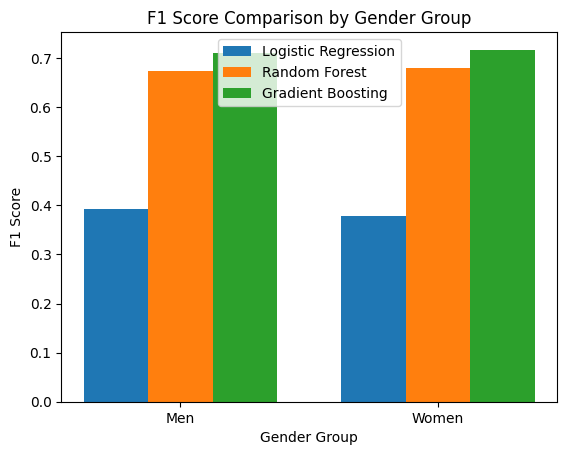

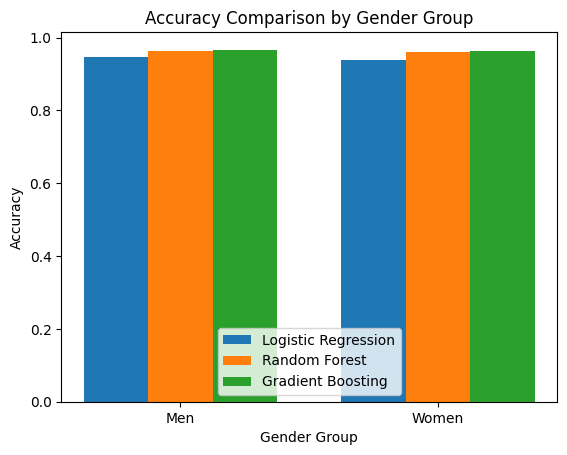

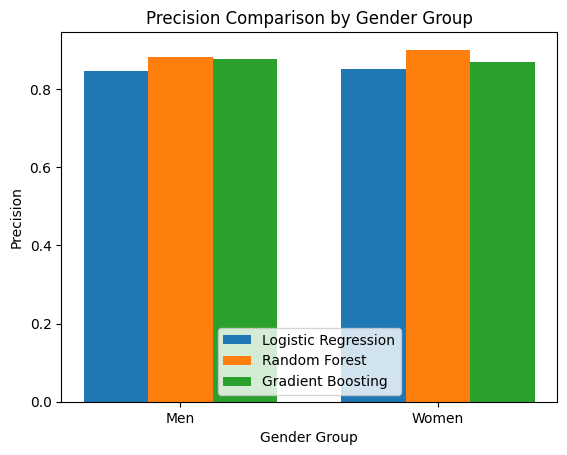

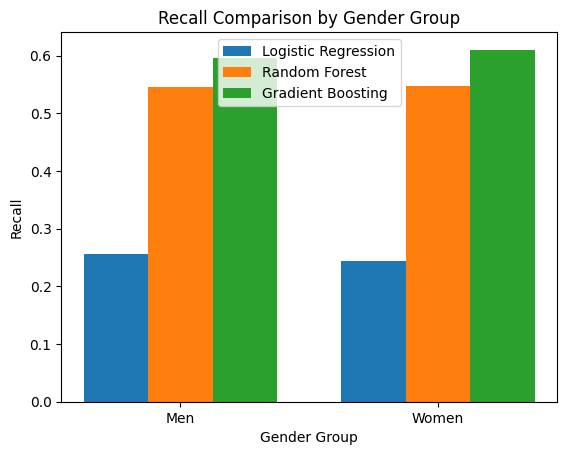

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Define lists to store performance metrics for each subgroup
gender_groups = X_test.groupby('gender')
lr_f1_scores = []
rf_f1_scores = []
gbc_f1_scores = []
lr_accuracies = []
rf_accuracies = []
gbc_accuracies = []
lr_precisions = []
rf_precisions = []
gbc_precisions = []
lr_recalls = []
rf_recalls = []
gbc_recalls = []

# Iterate over gender groups
for gender_group, gender_data in gender_groups:
    # Extract the subgroup data
    X_gender_group = gender_data
    y_gender_group = y_test.loc[gender_data.index]

    # Evaluate model predictions on the subgroup data
    lr_predictions_gender = model_LogisticRegression.predict(X_gender_group)
    rf_predictions_gender = model_RandomForestClassifier.predict(X_gender_group)
    gbc_predictions_gender = model_GBC.predict(X_gender_group)

    # Calculate evaluation metrics for each model
    lr_f1_gender = f1_score(y_gender_group, lr_predictions_gender)
    rf_f1_gender = f1_score(y_gender_group, rf_predictions_gender)
    gbc_f1_gender = f1_score(y_gender_group, gbc_predictions_gender)
    
    lr_accuracy_gender = accuracy_score(y_gender_group, lr_predictions_gender)
    rf_accuracy_gender = accuracy_score(y_gender_group, rf_predictions_gender)
    gbc_accuracy_gender = accuracy_score(y_gender_group, gbc_predictions_gender)

    lr_precision_gender = precision_score(y_gender_group, lr_predictions_gender)
    rf_precision_gender = precision_score(y_gender_group, rf_predictions_gender)
    gbc_precision_gender = precision_score(y_gender_group, gbc_predictions_gender)

    lr_recall_gender = recall_score(y_gender_group, lr_predictions_gender)
    rf_recall_gender = recall_score(y_gender_group, rf_predictions_gender)
    gbc_recall_gender = recall_score(y_gender_group, gbc_predictions_gender)

    # Store F1 scores for each model
    lr_f1_scores.append(lr_f1_gender)
    rf_f1_scores.append(rf_f1_gender)
    gbc_f1_scores.append(gbc_f1_gender)

    # Store accuracy, precision, and recall for each model
    lr_accuracies.append(lr_accuracy_gender)
    rf_accuracies.append(rf_accuracy_gender)
    gbc_accuracies.append(gbc_accuracy_gender)

    lr_precisions.append(lr_precision_gender)
    rf_precisions.append(rf_precision_gender)
    gbc_precisions.append(gbc_precision_gender)

    lr_recalls.append(lr_recall_gender)
    rf_recalls.append(rf_recall_gender)
    gbc_recalls.append(gbc_recall_gender)

# Create a bar plot to compare F1 scores across gender groups
x = np.arange(len(gender_groups))
width = 0.25

fig, ax = plt.subplots()
lr_bar = ax.bar(x, lr_f1_scores, width, label='Logistic Regression')
rf_bar = ax.bar(x + width, rf_f1_scores, width, label='Random Forest')
gbc_bar = ax.bar(x + 2 * width, gbc_f1_scores, width, label='Gradient Boosting')

ax.set_xlabel('Gender Group')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score Comparison by Gender Group')
ax.set_xticks(x + width)
ax.set_xticklabels(['Men', 'Women'])
ax.legend()

plt.show()

# Create a bar plot to compare accuracy across gender groups
fig, ax = plt.subplots()
lr_bar = ax.bar(x, lr_accuracies, width, label='Logistic Regression')
rf_bar = ax.bar(x + width, rf_accuracies, width, label='Random Forest')
gbc_bar = ax.bar(x + 2 * width, gbc_accuracies, width, label='Gradient Boosting')

ax.set_xlabel('Gender Group')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison by Gender Group')
ax.set_xticks(x + width)
ax.set_xticklabels(['Men', 'Women'])
ax.legend()

plt.show()

# Create a bar plot to compare precision across gender groups
fig, ax = plt.subplots()
lr_bar = ax.bar(x, lr_precisions, width, label='Logistic Regression')
rf_bar = ax.bar(x + width, rf_precisions, width, label='Random Forest')
gbc_bar = ax.bar(x + 2 * width, gbc_precisions, width, label='Gradient Boosting')

ax.set_xlabel('Gender Group')
ax.set_ylabel('Precision')
ax.set_title('Precision Comparison by Gender Group')
ax.set_xticks(x + width)
ax.set_xticklabels(['Men', 'Women'])
ax.legend()

plt.show()

# Create a bar plot to compare recall across gender groups
fig, ax = plt.subplots()
lr_bar = ax.bar(x, lr_recalls, width, label='Logistic Regression')
rf_bar = ax.bar(x + width, rf_recalls, width, label='Random Forest')
gbc_bar = ax.bar(x + 2 * width, gbc_recalls, width, label='Gradient Boosting')

ax.set_xlabel('Gender Group')
ax.set_ylabel('Recall')
ax.set_title('Recall Comparison by Gender Group')
ax.set_xticks(x + width)
ax.set_xticklabels(['Men', 'Women'])
ax.legend()

plt.show()


In [ ]:
# Prepare the data
X_train = new_x_df
y_train = y
X_test, y_test 